# Capstone Project : Menyelesaikan Permasalahan Perusahaan Asuransi dengan Mendeteksi Penipuan Terhadapa Klaim Asuransi Perusahaan.

**Grup LAI25-RM096**

- A225YBF247	 = Khamdan Annas Fakhryza
- A015YBF265	 = Mahendra Nabiha Wisnu Aditya
- A429XBF292	 = Mu'azah Al'adawiyah
- A215YBM352	 = Muhammad Salwa Fairus Santoso


## Deskripsi Project

Dalam industri asuransi, memprediksi kemungkinan klaim secara akurat sangat penting untuk penilaian risiko dan penetapan harga polis. Namun, kumpulan data klaim asuransi sering kali mengalami ketidakseimbangan kelas, di mana jumlah kejadian non-klaim jauh melebihi klaim aktual. Ketidakseimbangan kelas ini menimbulkan tantangan untuk pemodelan prediktif, yang sering kali mengarah pada model yang bias yang lebih memihak kelas mayoritas, sehingga menghasilkan kinerja yang buruk untuk kelas minoritas, yang biasanya lebih diminati.


## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# ==============================
# Data Manipulation & Utilities
# ==============================
import numpy as np
import pandas as pd
from collections import Counter

# ==============================
# Visualization
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# Statistical Analysis
# ==============================
from scipy import stats
from scipy.stats import pearsonr

# ==============================
# Machine Learning - Preprocessing
# ==============================
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# ==============================
# Machine Learning - Models
# ==============================
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,
    ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# ==============================
# Machine Learning - Evaluation
# ==============================
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report,
    confusion_matrix
)

# ==============================
# Model Persistence
# ==============================
import joblib



In [2]:
import numpy
import pandas
import matplotlib
import seaborn
import sklearn
import scipy
import joblib
import sqlalchemy

packages = {
    "numpy": numpy.__version__,
    "pandas": pandas.__version__,
    "matplotlib": matplotlib.__version__,
    "seaborn": seaborn.__version__,
    "scikit-learn": sklearn.__version__,
    "scipy": scipy.__version__,
    "joblib": joblib.__version__,
    "sqlalchemy": sqlalchemy.__version__,
}

for name, version in packages.items():
    print(f"{name}: {version}")

numpy: 2.0.2
pandas: 2.2.2
matplotlib: 3.10.0
seaborn: 0.13.2
scikit-learn: 1.6.1
scipy: 1.15.3
joblib: 1.5.1
sqlalchemy: 2.0.41


### Menyiapkan data yang akan digunakan

In [3]:
!curl -L -o insurance-claims.zip\
  https://www.kaggle.com/api/v1/datasets/download/litvinenko630/insurance-claims

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  672k  100  672k    0     0   556k      0  0:00:01  0:00:01 --:--:--  556k


In [4]:
!unzip insurance-claims.zip

Archive:  insurance-claims.zip
  inflating: Insurance claims data.csv  


In [5]:
df = pd.read_csv("Insurance claims data.csv")

print(df.head())

   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steer

## Data Understanding

- Menampilkan kembali dataset 5 baris pertama dari data tersebut.

In [11]:
df.head()

policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steering  \
0                 Yes                 Yes               Yes   
1                 Yes                 Yes               Yes   
2                 Yes                 Yes               Yes   
3                  No                  No               Yes   
4                 Yes                 Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                              Yes                            No    Yes   
1                              Yes                           Yes    Yes   
2                              Yes                            No    Yes   
3                               No                            No     No   
4                               No                            No    Yes   

  is_speed_alert ncap_rating  claim_status  
0            Yes           3             0  
1            Yes           4             0  
2            Yes           3             0  
3            Yes           0             0  
4            Yes           5             0  

[5 rows x 41 columns]

- Menampilkan informasi umum tentang dataset, seperti jumlah baris dan kolom, tipe data tiap kolom, serta jumlah data yang tidak kosong (non-null).

In [12]:
print("Informasi Dataset :")
df.info()

Informasi Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-nul

Maka dapatlah informasi dataset tersebut memiliki 41 kolom dengan 58592 baris. Dan type datanya sendiri yaitu terdapat float64 3 kolom, int64 10 kolom, dan type data object 28 kolom.

- Melakukan Missing Value

In [13]:
print("Missing Value : ")
print(df.isnull().sum())

Missing Value : 
policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                            

Dari hasil diatas dataset tidak memiliki missing value. Sehingga, tidak perlu dilakukan penanganan terhadap missing value tersebut.

- Mengecek data duplikat pada dataset

In [14]:
print("Jumlah Data Duplikat : ")
print(df.duplicated().sum())

Jumlah Data Duplikat : 
0


Maka, dapat dikatakan bahwa dataset tidak memiliki data duplikat.

- Menampilkan Statistik Deskriptif dari dataset

In [15]:
print("Statistik Deskriptif : ")
df.describe()

Statistik Deskriptif : 


subscription_length   vehicle_age  customer_age  region_density  \
count         58592.000000  58592.000000  58592.000000    58592.000000   
mean              6.111688      1.388473     44.823935    18826.858667   
std               4.142790      1.134413      6.935604    17660.174792   
min               0.000000      0.000000     35.000000      290.000000   
25%               2.100000      0.400000     39.000000     6112.000000   
50%               5.700000      1.200000     44.000000     8794.000000   
75%              10.400000      2.200000     49.000000    27003.000000   
max              14.000000     20.000000     75.000000    73430.000000   

            airbags  displacement      cylinder  turning_radius        length  \
count  58592.000000  58592.000000  58592.000000    58592.000000  58592.000000   
mean       3.137066   1162.355851      3.626963        4.852893   3850.476891   
std        1.832641    266.304786      0.483616        0.228061    311.457119   
min        1.000000    796.000000      3.000000        4.500000   3445.000000   
25%        2.000000    796.000000      3.000000        4.600000   3445.000000   
50%        2.000000   1197.000000      4.000000        4.800000   3845.000000   
75%        6.000000   1493.000000      4.000000        5.000000   3995.000000   
max        6.000000   1498.000000      4.000000        5.200000   4300.000000   

              width  gross_weight   ncap_rating  claim_status  
count  58592.000000  58592.000000  58592.000000  58592.000000  
mean    1672.233667   1385.276813      1.759950      0.063968  
std      112.089135    212.423085      1.389576      0.244698  
min     1475.000000   1051.000000      0.000000      0.000000  
25%     1515.000000   1185.000000      0.000000      0.000000  
50%     1735.000000   1335.000000      2.000000      0.000000  
75%     1755.000000   1510.000000      3.000000      0.000000  
max     1811.000000   1720.000000      5.000000      1.000000

Insight dari Statistik yaitu :

Berdasarkan statistik deskriptif data klaim asuransi mobil, sebagian besar pelanggan memiliki masa berlangganan sekitar 6 tahun dengan usia kendaraan relatif baru (rata-rata 1,39 tahun) dan usia pelanggan berkisar antara 35 hingga 75 tahun, dengan rata-rata 44 tahun. Mayoritas tinggal di wilayah dengan kepadatan sedang hingga tinggi, meskipun terdapat outlier dengan kepadatan ekstrem. Rata-rata kendaraan memiliki 2–3 airbag, kapasitas mesin sekitar 1162 cc, dan konfigurasi 4 silinder yang umum pada mobil kecil hingga menengah. Dimensi kendaraan menunjukkan ukuran kompak, cocok untuk lingkungan perkotaan, dan rating keselamatan NCAP sebagian besar rendah (rata-rata hanya 1,76), yang bisa meningkatkan risiko klaim. Meski begitu, hanya sekitar 6,4% pelanggan yang tercatat mengajukan klaim, menunjukkan bahwa data cukup imbalance. Faktor-faktor seperti usia kendaraan, jumlah airbag, rating NCAP, dan kepadatan wilayah kemungkinan besar berkontribusi terhadap tingkat klaim dan perlu dianalisis lebih lanjut.

- Data Cleaning

Data Cleaning merupakan tahapan awal dari proses Data Preparation yang berfokus pada pembersihan data, seperti:
- penanganan missing value,
- penghapusan data duplikat, dan
- identifikasi serta penanganan outlier.

Setelah proses cleaning selesai, data masuk ke tahapan lanjutan dari Data Preparation, yang mencakup:
- encoding data kategorikal,
- scaling/normalisasi fitur,
- teknik seperti SMOTE untuk menangani imbalance data,
- serta pembagian data (splitting) menjadi data latih dan uji (train-test split),
agar data siap digunakan dalam proses pemodelan machine learning.

- Penanganan missing value dan data duplikat

Pada dataset ini tidak dilakukan penanganan missing value dan data duplikat karena tidak memiliki keduanya / 0.

- Penanganan Outlier Deteksi

Setelah melakukan pengecekan outlier pada tahap sebelumnya, ditemukan banyak outlier dalam dataset. Oleh karena itu, diperlukan penanganan terhadap outlier. Namun, sebelum melakukan penanganan, perlu dipastikan bahwa tipe data pada setiap kolom sudah sesuai. Beberapa kolom yang seharusnya bertipe kategori saat ini telah diubah menjadi numerik. Hal ini perlu diperbaiki agar proses deteksi dan penanganan outlier hanya dilakukan pada data numerik yang benar-benar bersifat kontinu, sehingga hasil analisis menjadi lebih akurat dan representatif.

Kenapa perlunya memisahkan kategori & numerik?
- Karena deteksi outlier (misalnya dengan IQR, Z-score, atau boxplot) hanya relevan untuk variabel numerik kontinu.
- Variabel kategori (misalnya: jenis kelamin, status, atau jurusan) yang dikodekan sebagai angka tidak seharusnya dianggap numerik saat menghitung outlier, karena nilainya tidak memiliki arti matematis.

- Deteksi sebelum outlier dengan IQR

In [16]:
num_feature = df.select_dtypes(include=['int64', 'float64']).columns
num_feature

Index(['subscription_length', 'vehicle_age', 'customer_age', 'region_density',
       'airbags', 'displacement', 'cylinder', 'turning_radius', 'length',
       'width', 'gross_weight', 'ncap_rating', 'claim_status'],
      dtype='object')

In [17]:
for col in num_feature:
  print(f"{col}")
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  fence_high = Q3 + 1.5*IQR
  fence_low = Q1 - 1.5*IQR
  outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
  print(outliers.shape)

subscription_length
(0, 41)
vehicle_age
(269, 41)
customer_age
(282, 41)
region_density
(3647, 41)
airbags
(0, 41)
displacement
(0, 41)
cylinder
(0, 41)
turning_radius
(0, 41)
length
(0, 41)
width
(0, 41)
gross_weight
(0, 41)
ncap_rating
(0, 41)
claim_status
(3748, 41)


### Exploratory Data Analysis

Exploratory Data Analysis (EDA) adalah proses untuk memahami data secara mendalam sebelum modeling. Langkah-langkahnya meliputi melihat struktur dan ringkasan data, menganalisis distribusi fitur, menemukan outlier, dan mengevaluasi hubungan antar variabel. Tujuannya adalah untuk menemukan pola, anomali, dan insight awal yang membantu dalam menentukan strategi preprocessing dan pemilihan model yang tepat.

- Mendistribusikan Fitur Kategorikal

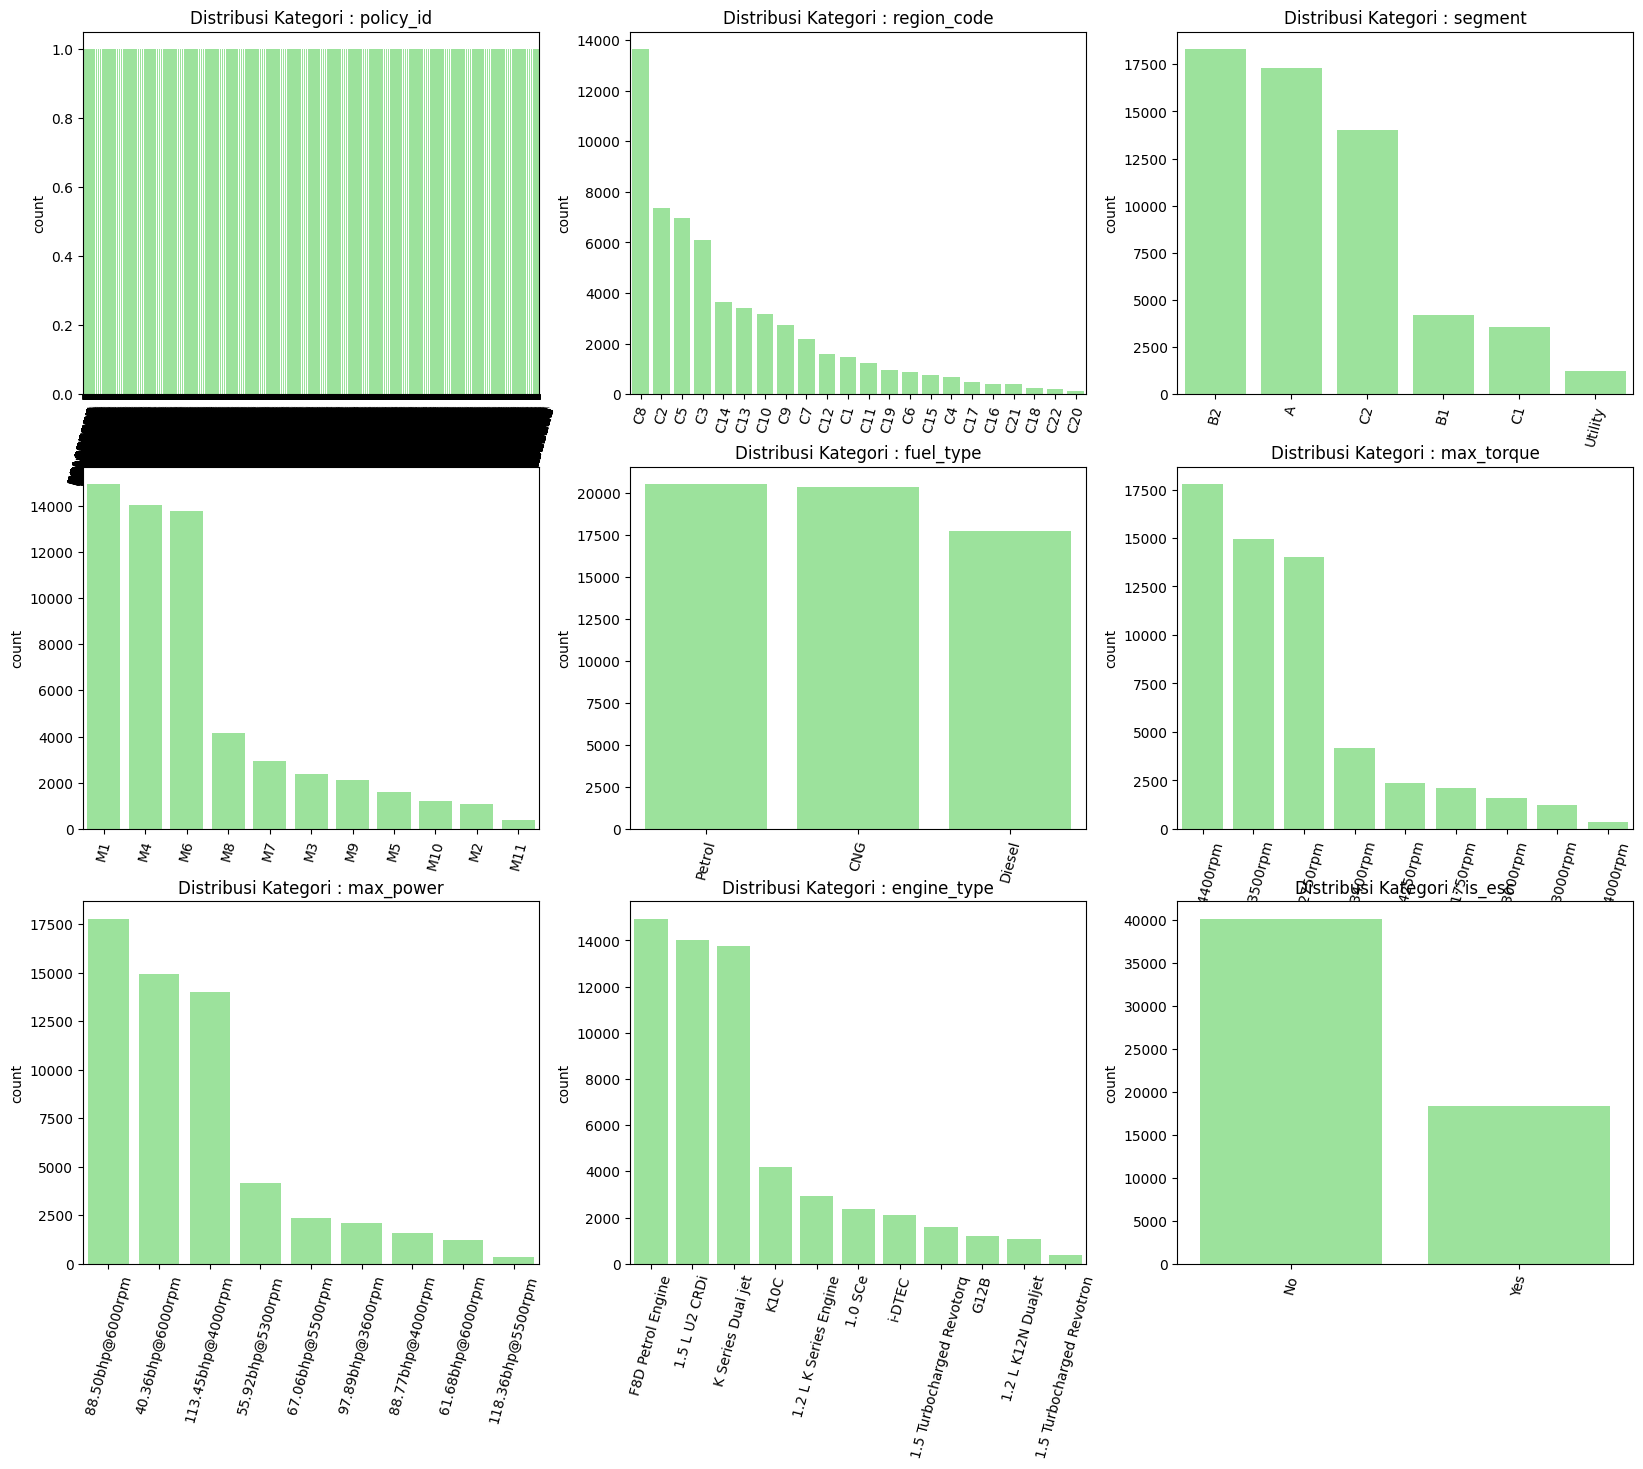

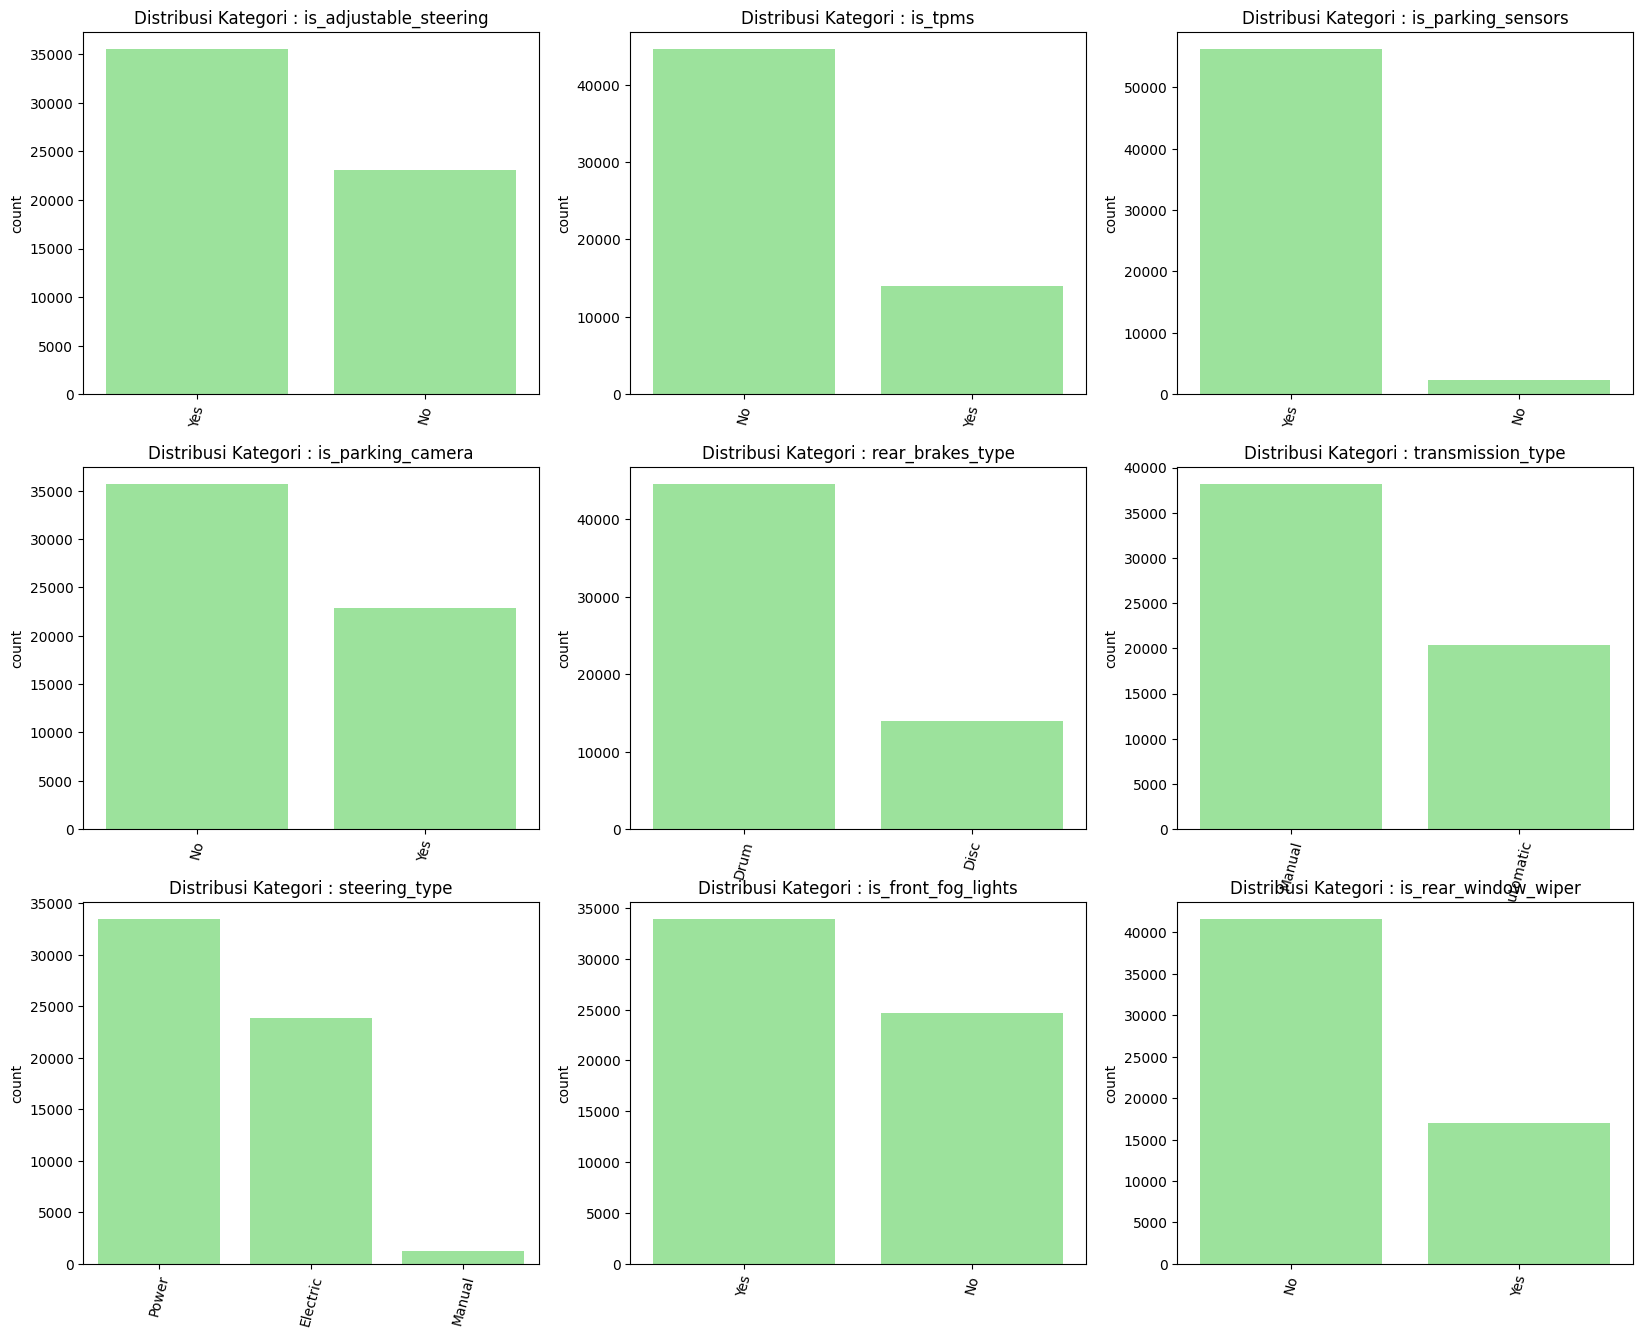

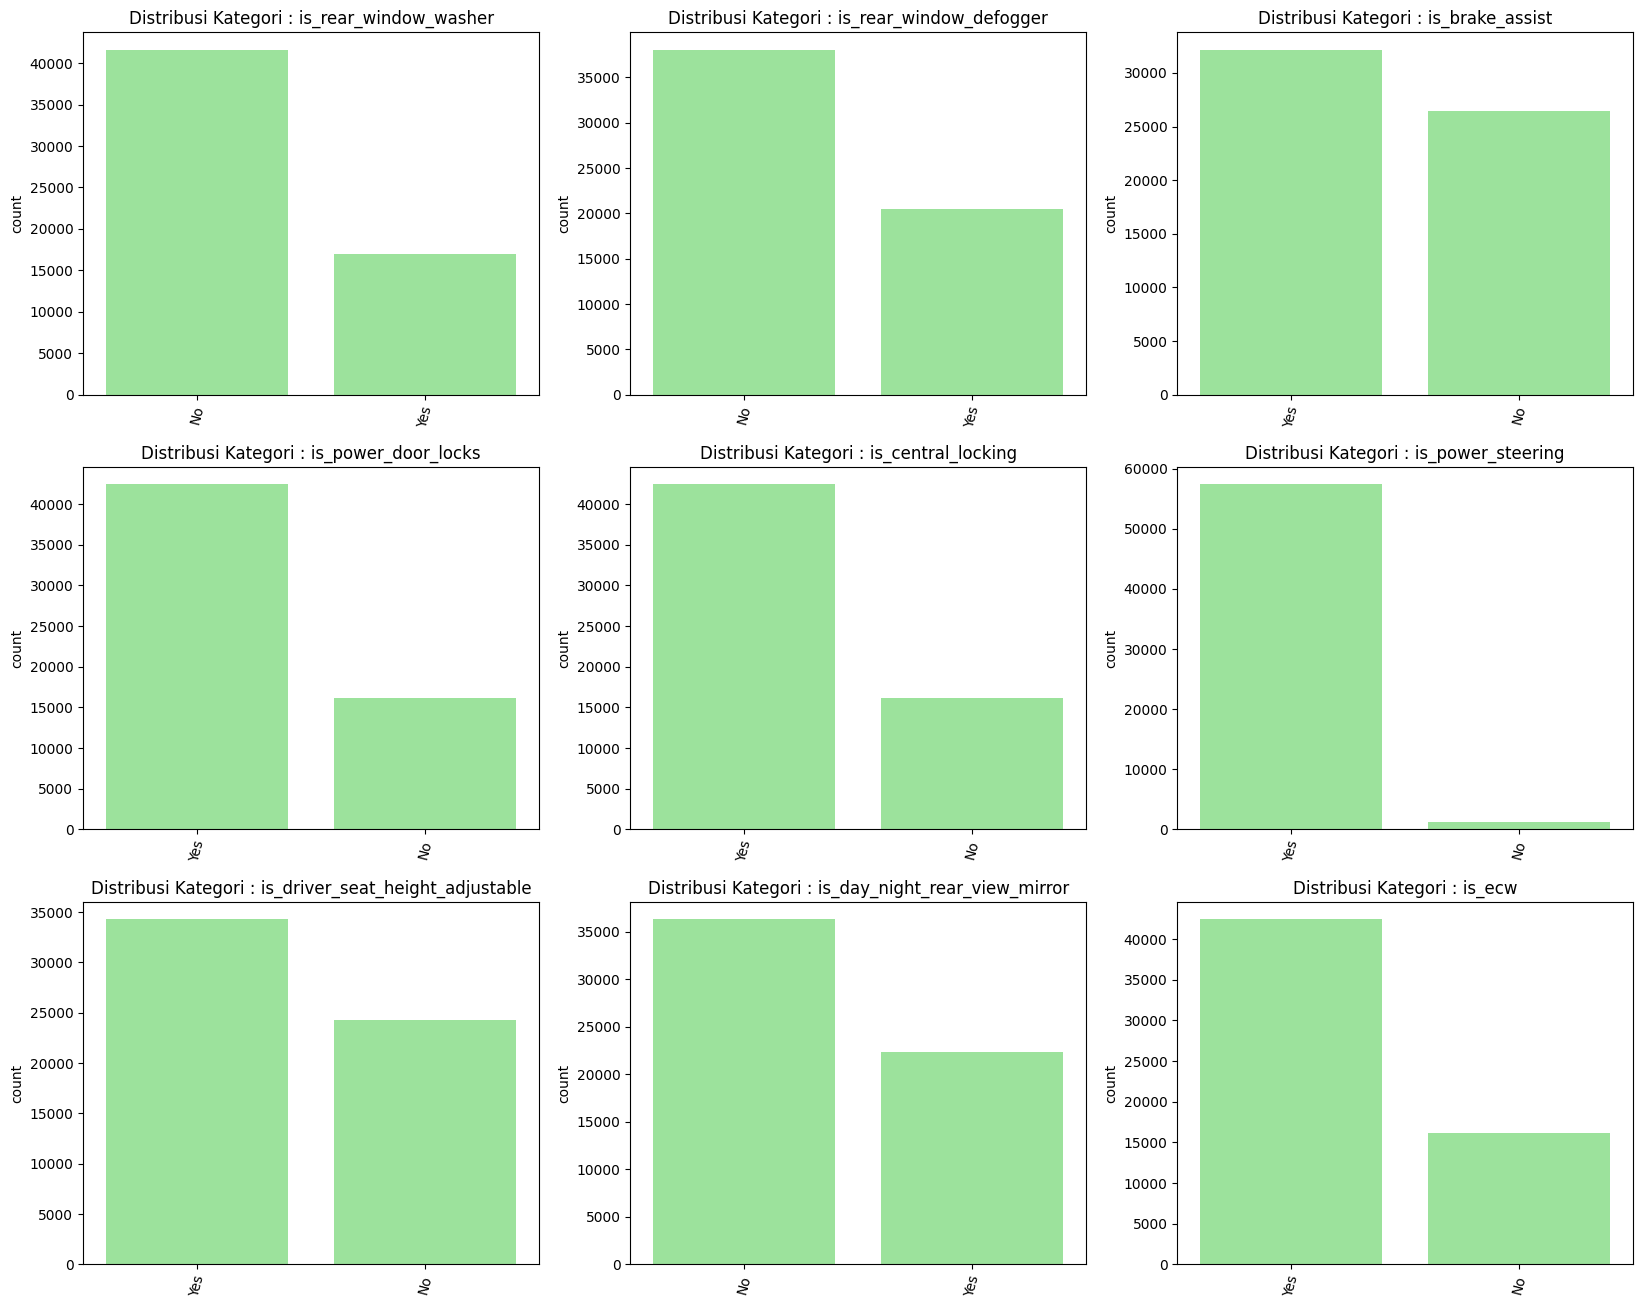

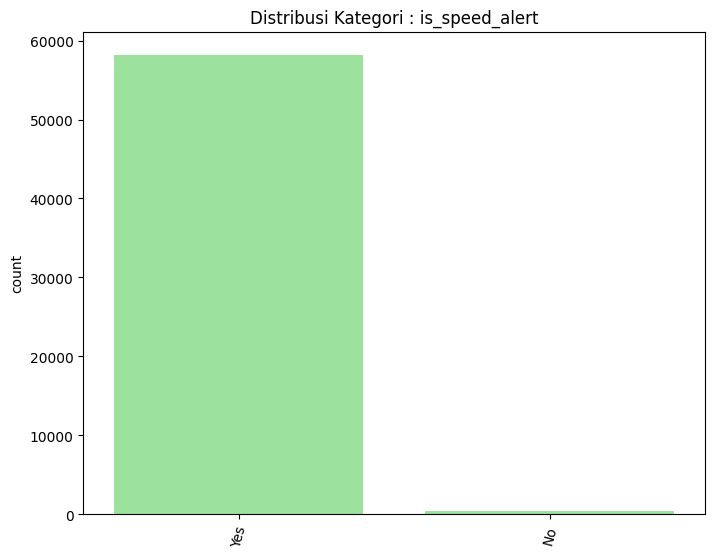

In [18]:
kategori = df.select_dtypes(include='object')

n_cols = 3
n_rows = 3
plots_per_page = n_cols * n_rows

for i in range (0, len(kategori.columns), plots_per_page):
  sub_cols = kategori.columns[i:i + plots_per_page]
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))
  axes = axes.flatten()

  for j, col in enumerate(sub_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[j], color='lightgreen')
    axes[j].set_title(f'Distribusi Kategori : {col}')
    axes[j].set_xlabel("")
    axes[j].tick_params(axis='x', rotation=75)

  for k in range (j + 1, plots_per_page) :
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

Menvisualisasikan distribusi semua kolom kategorikal dalam dataset dengan membuat grafik countplot secara bertahap. Hal ini membantu memahami sebaran kategori di setiap fitur, seperti dominasi kelas atau ketidakseimbangan data.

- Mendistribusikan Fitur Numerik

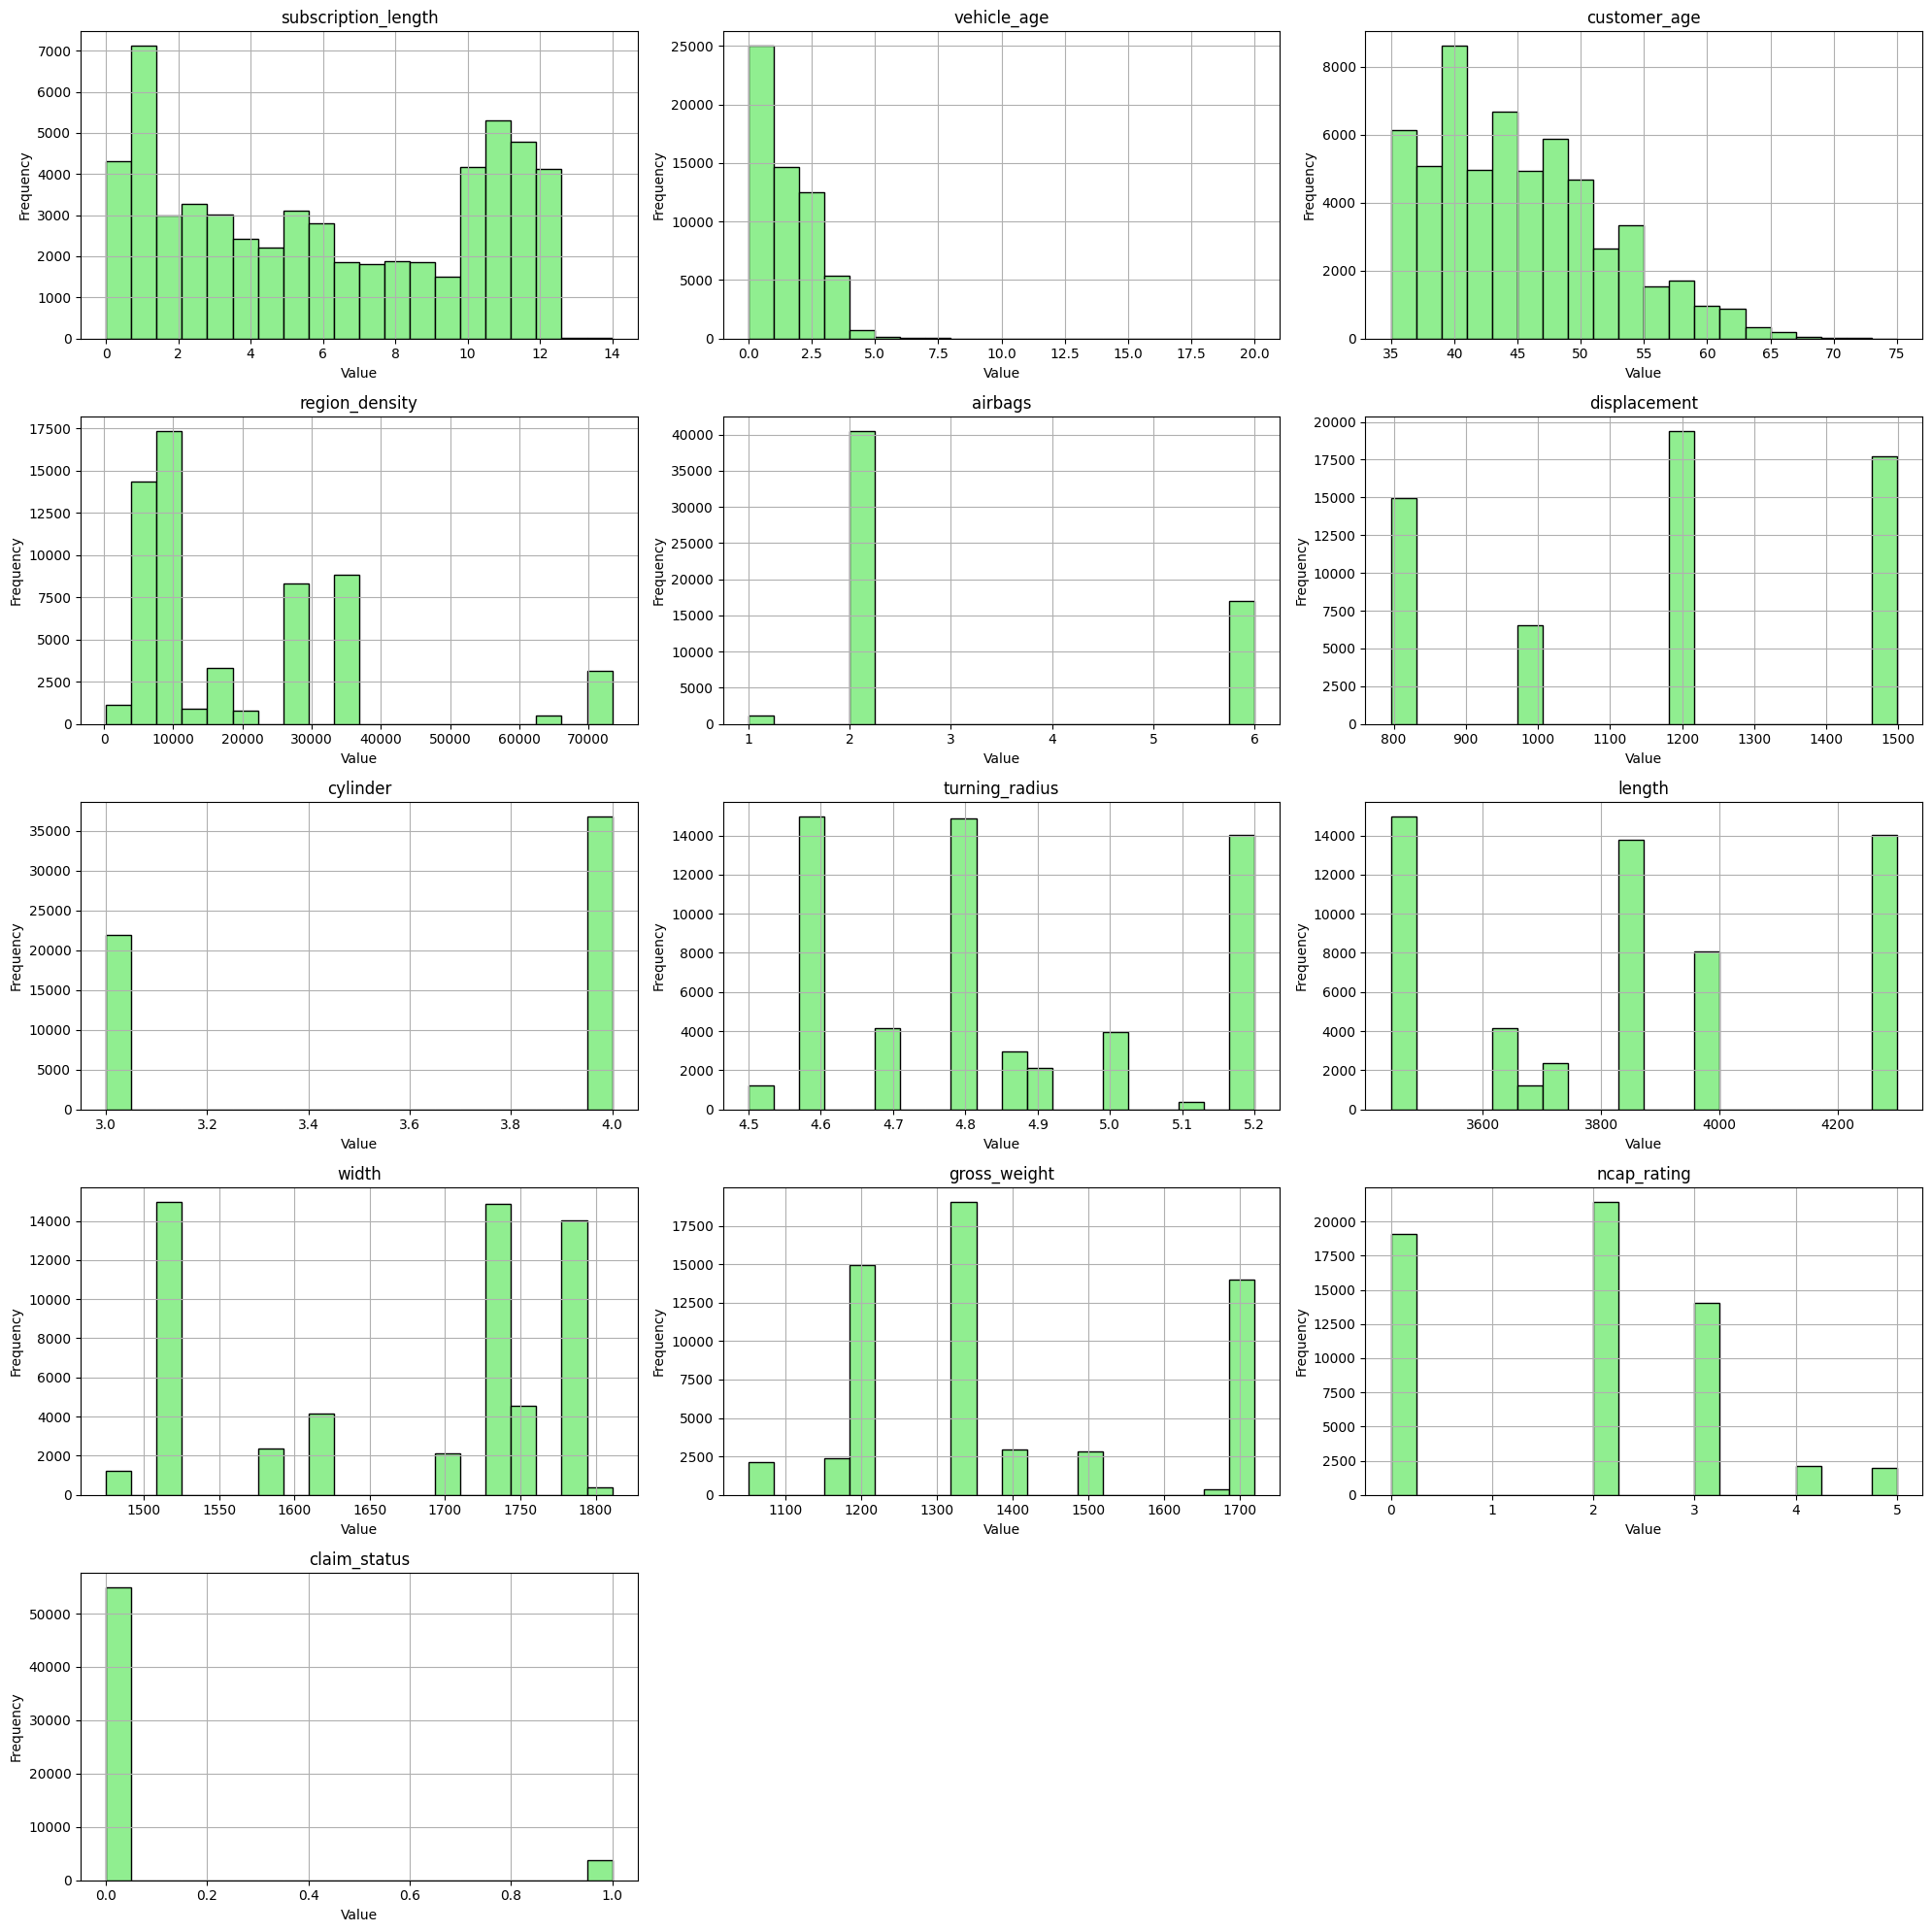

In [19]:
num_vars = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = -(-len(num_vars) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(num_vars):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black', color='lightgreen')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Membuat Histogram semua fitur numerik dalam dataset, sehingga bisa melihat distribusi masing-masing fitur secara visual. Histogram membantu mengidentifikasi pola distribusi data seperti normal, miring, atau adanya outlier.

- Boxplot Dateksi Outlier

--- Cek Outlier dengan Boxplot ---


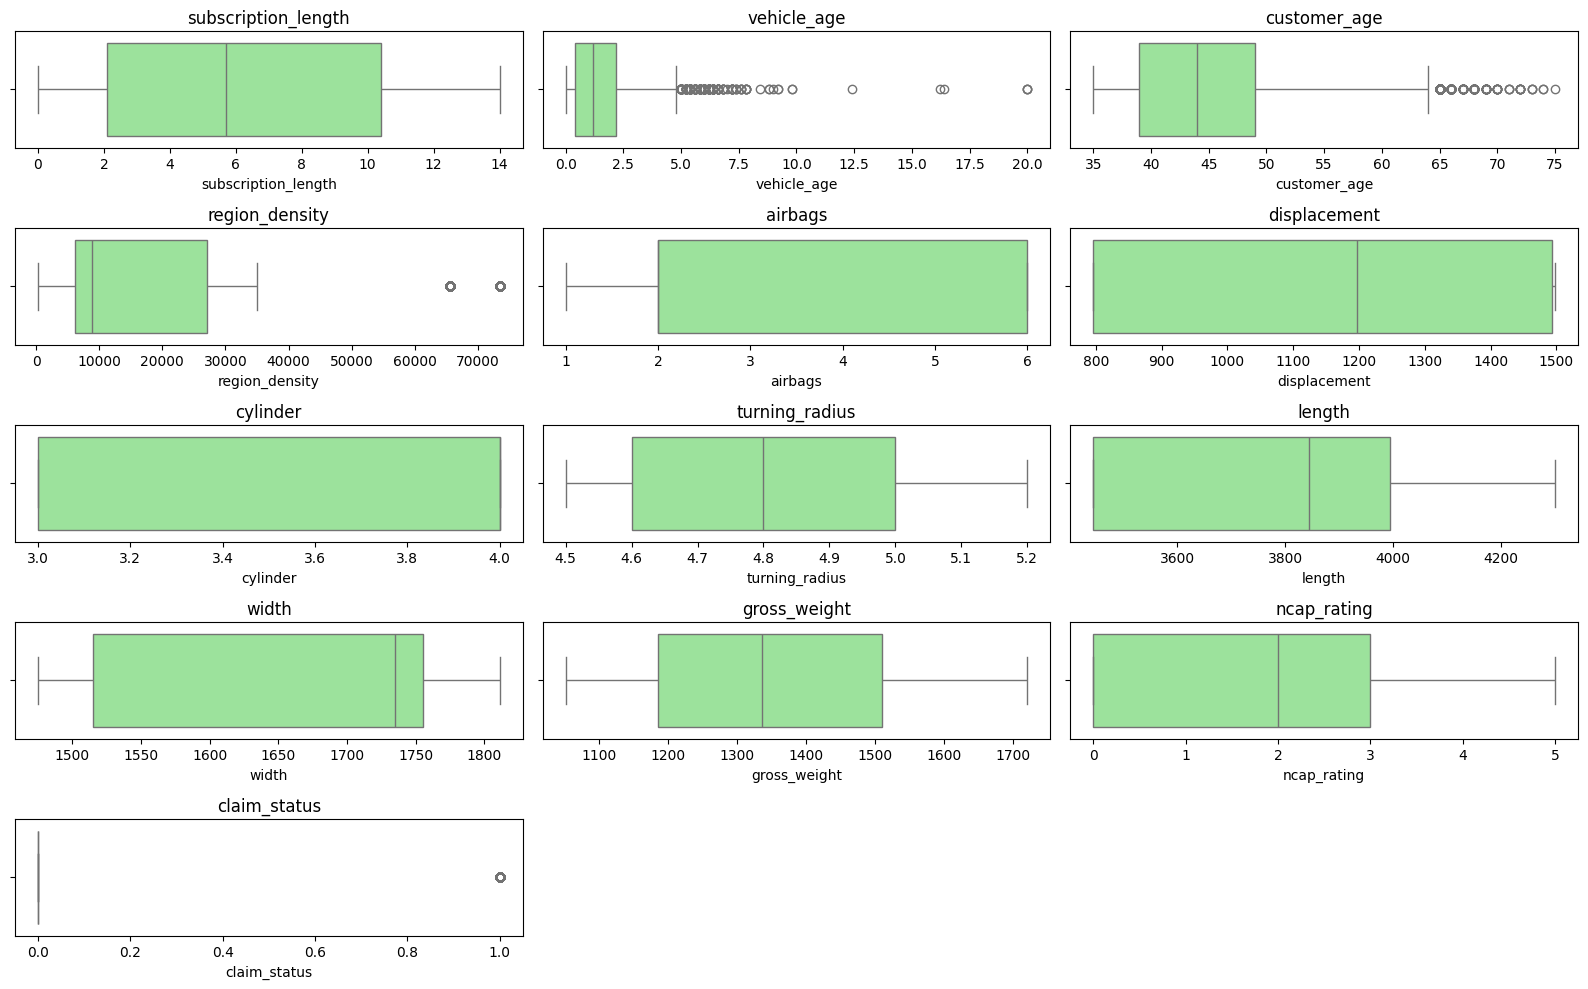

In [20]:
print('--- Cek Outlier dengan Boxplot ---')
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_feature):
    plt.subplot((len(num_feature) + 2)//3, 3, i+1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

- Distribusi semua data

Cek Distribusi Data


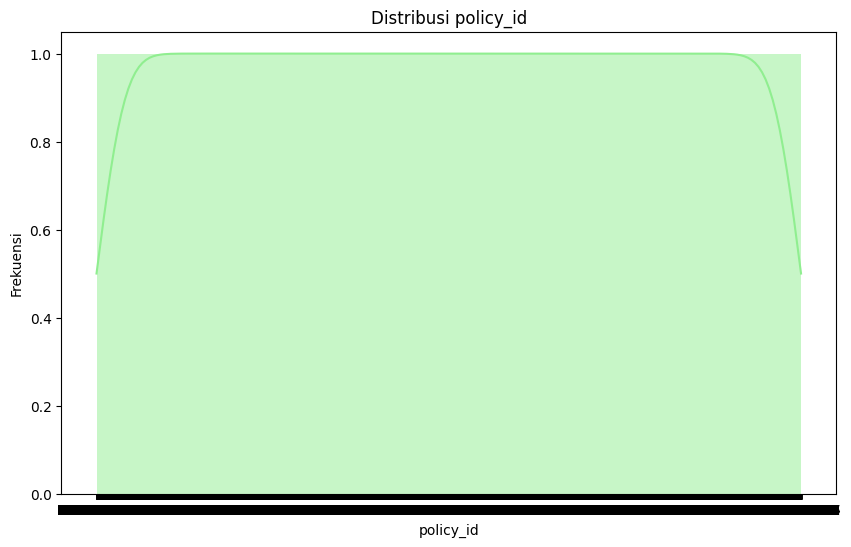

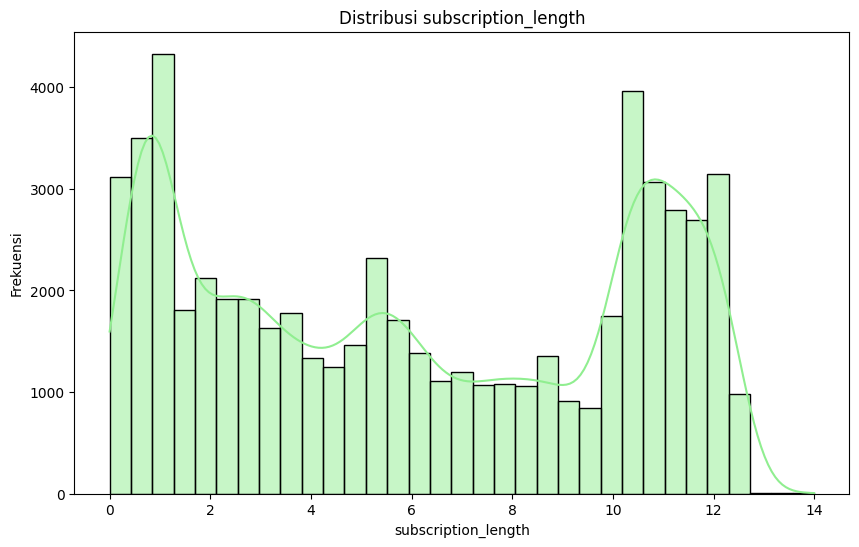

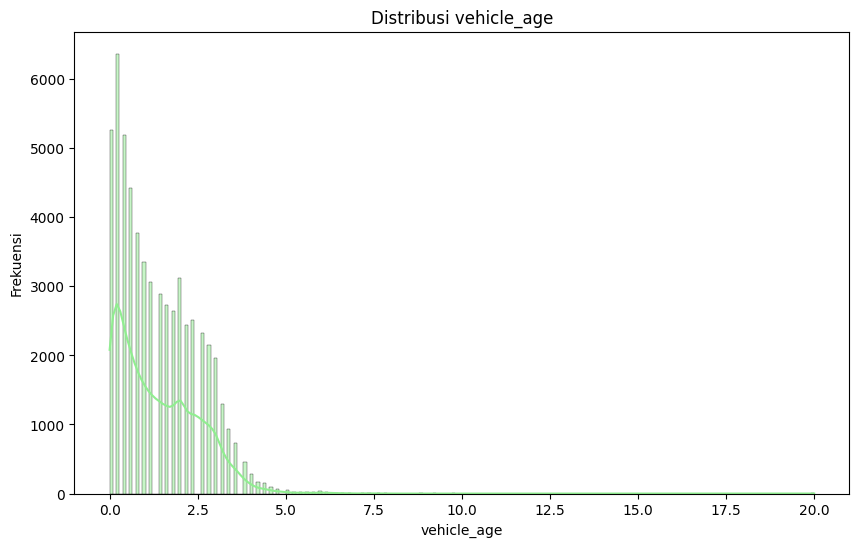

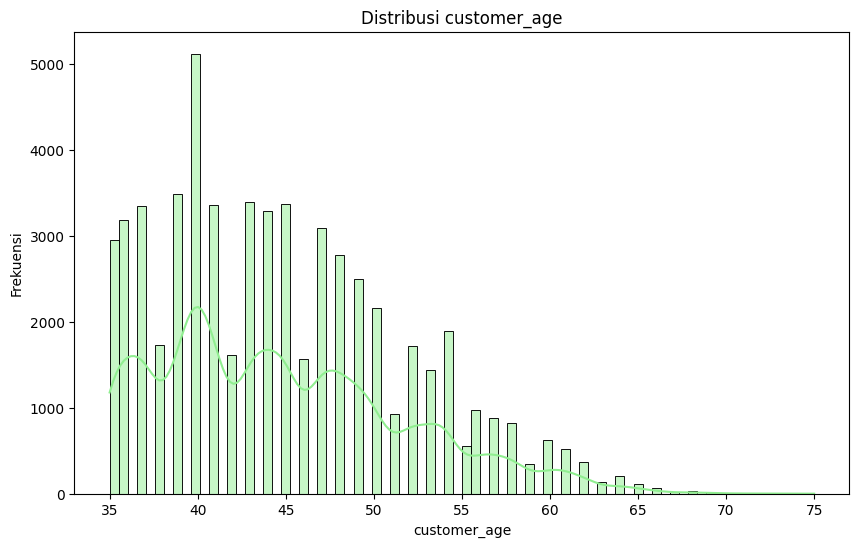

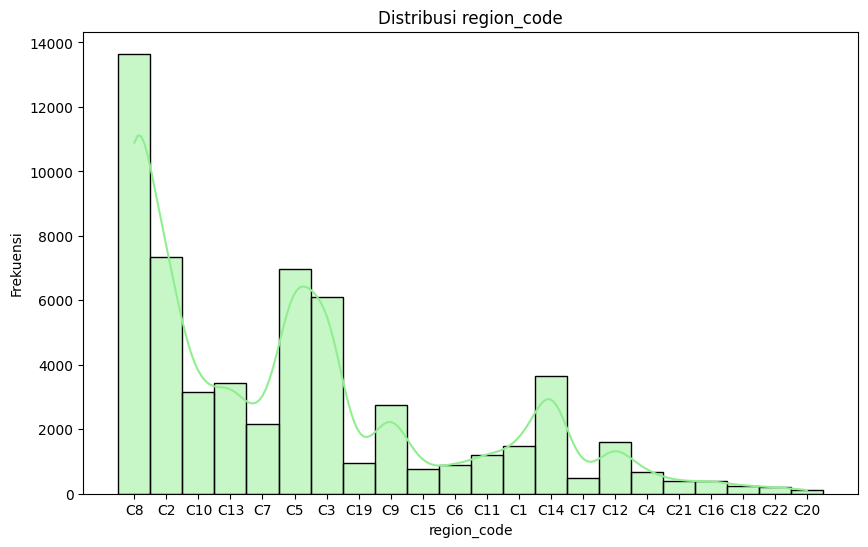

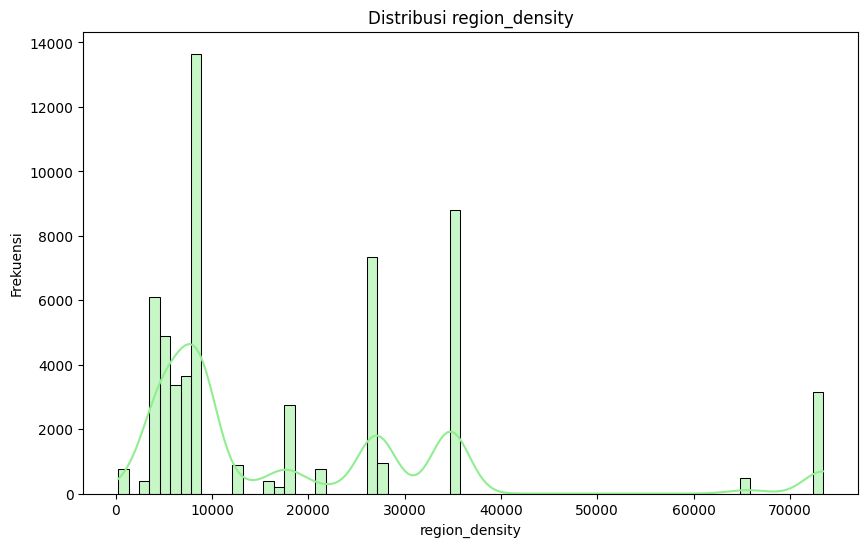

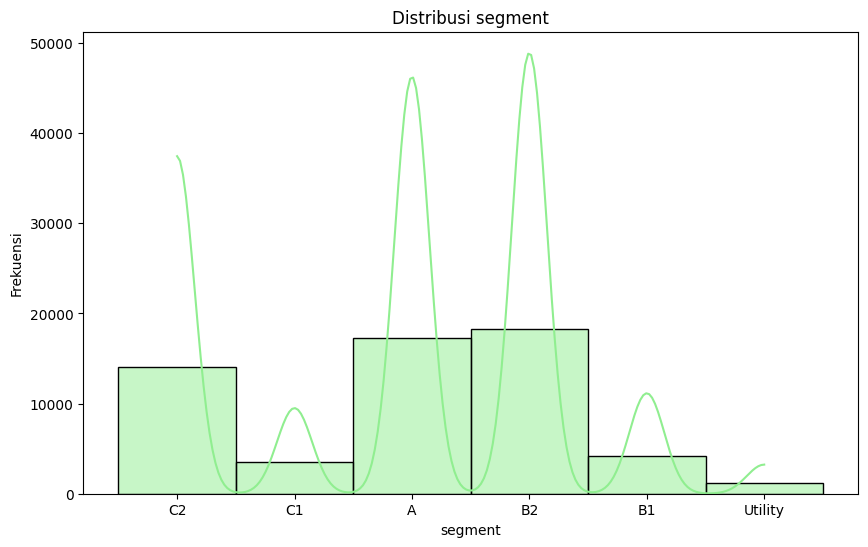

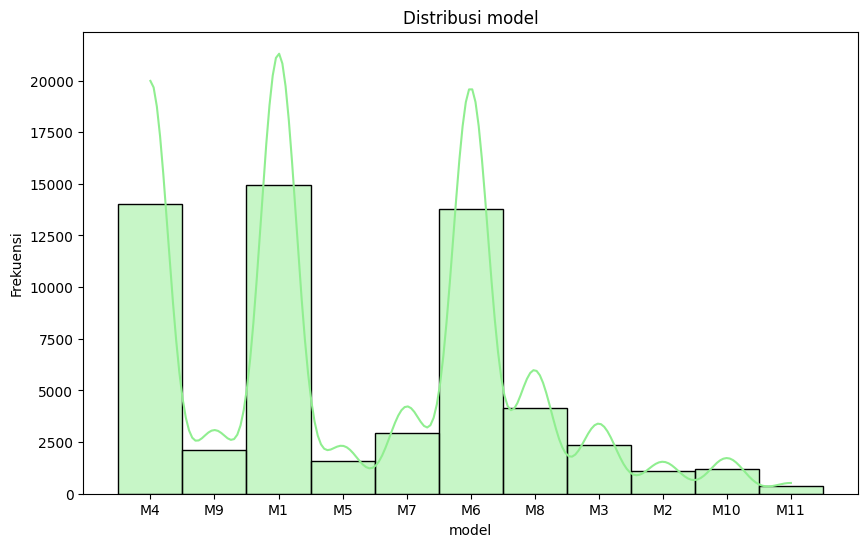

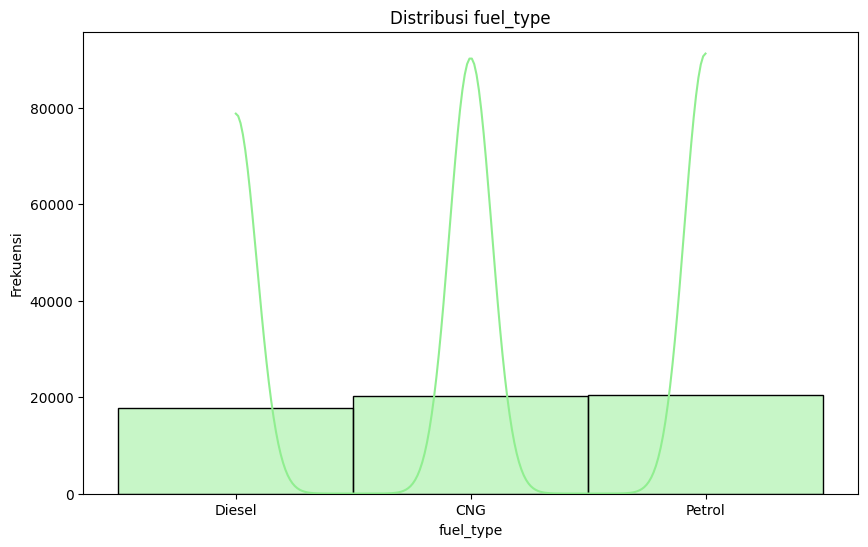

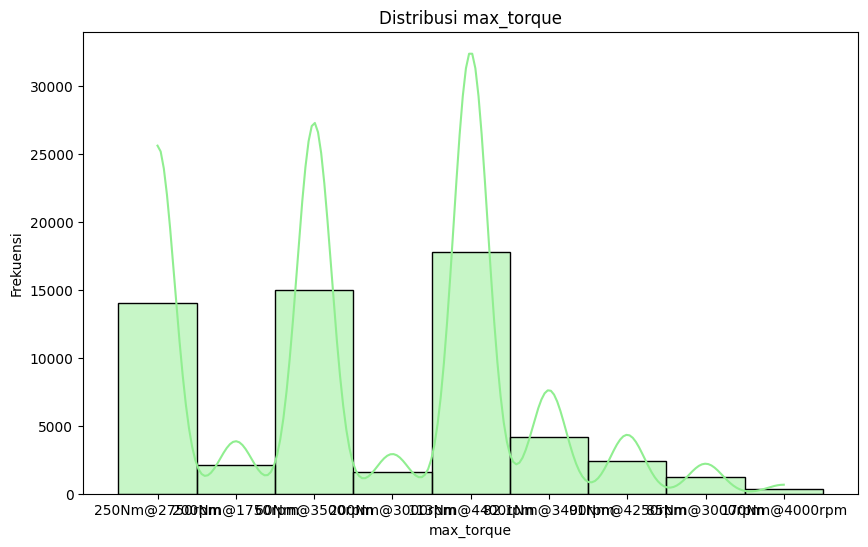

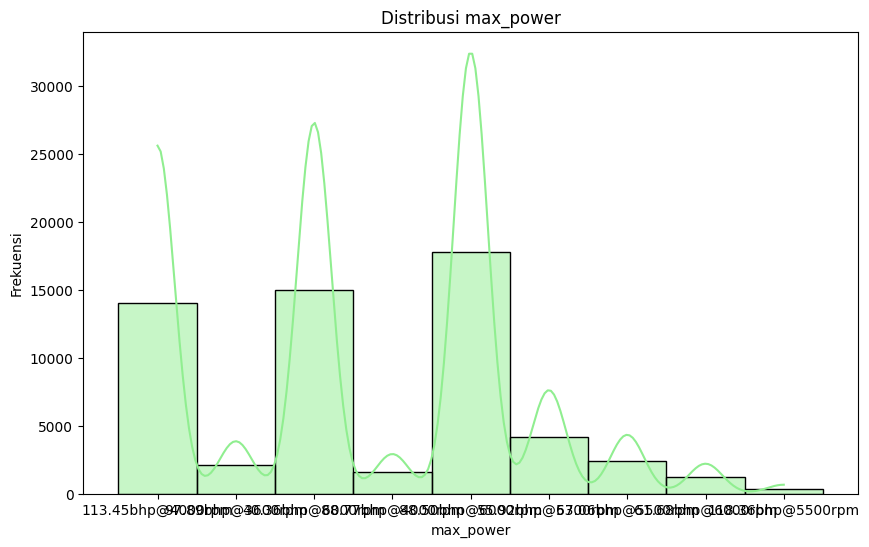

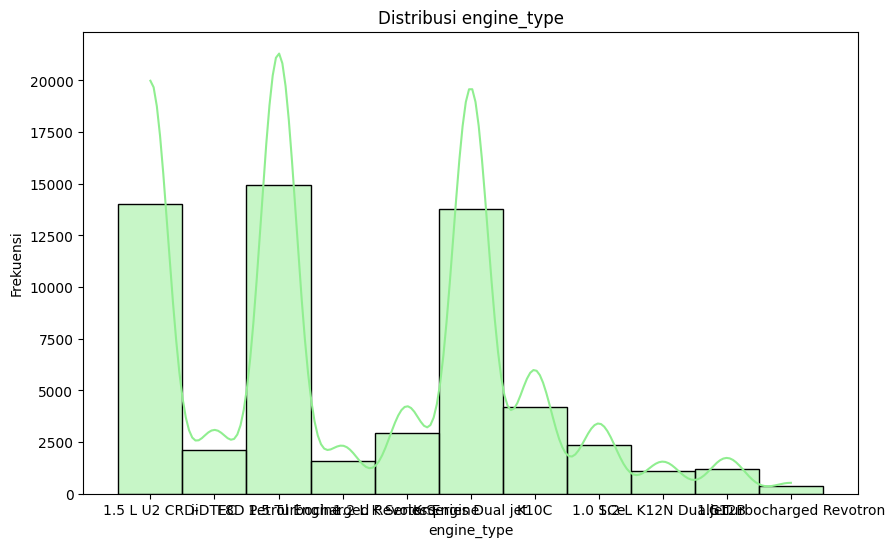

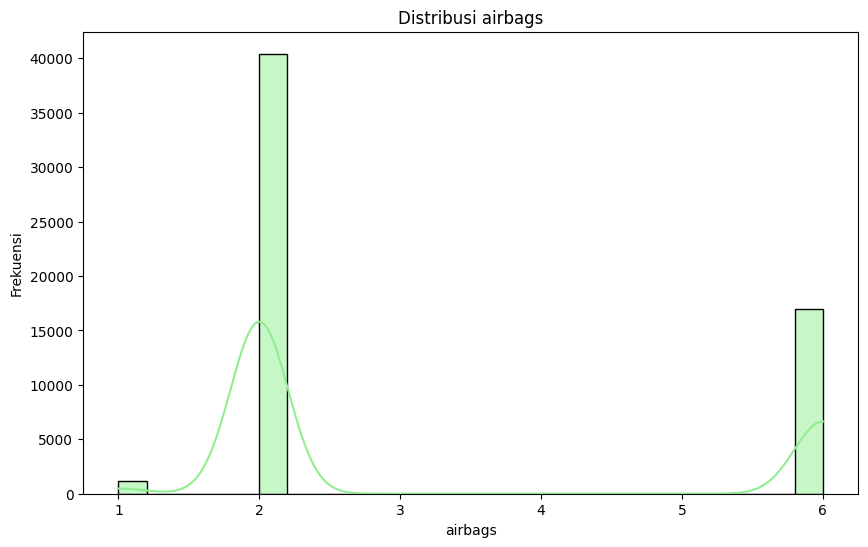

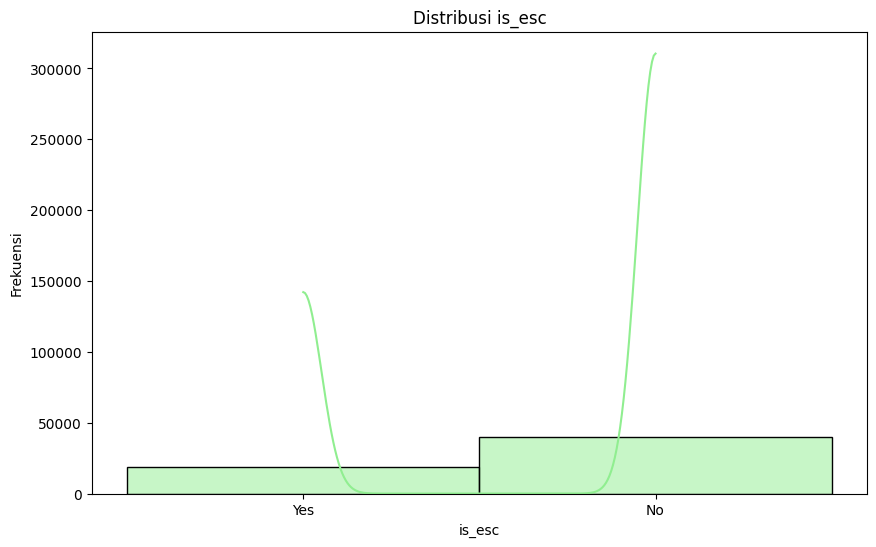

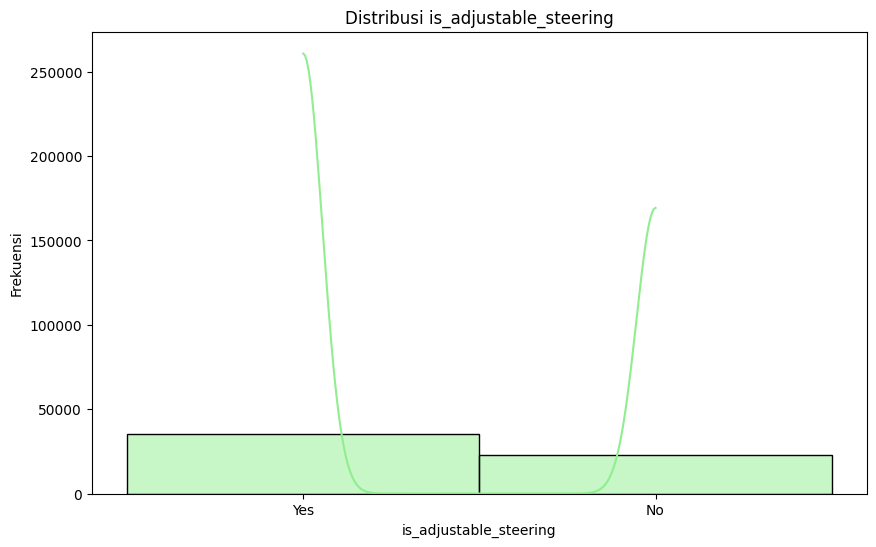

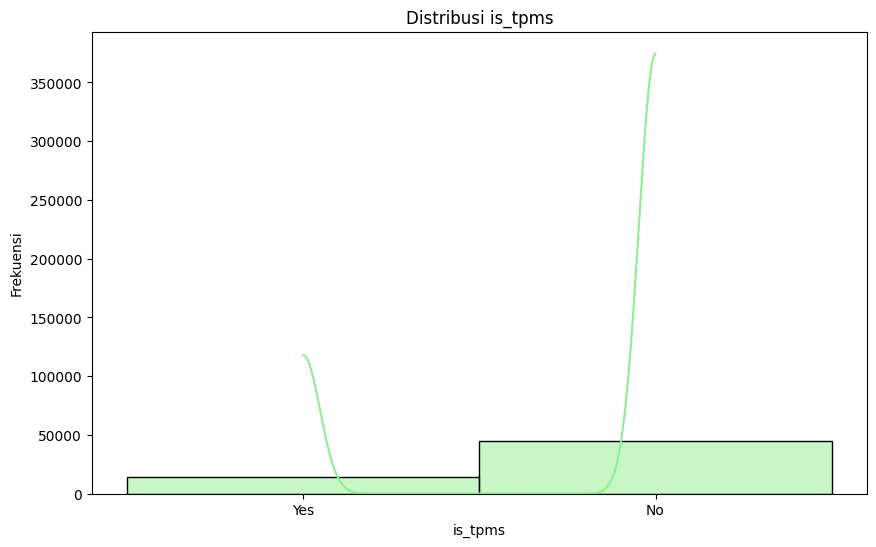

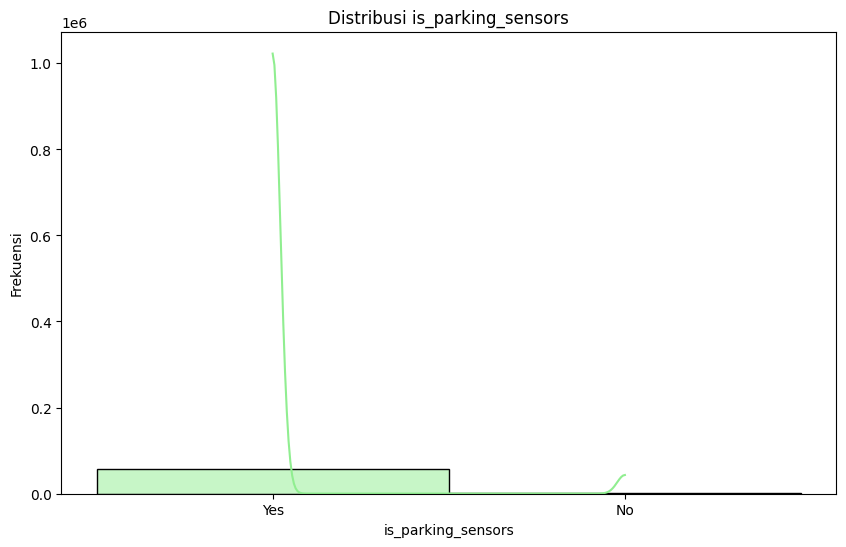

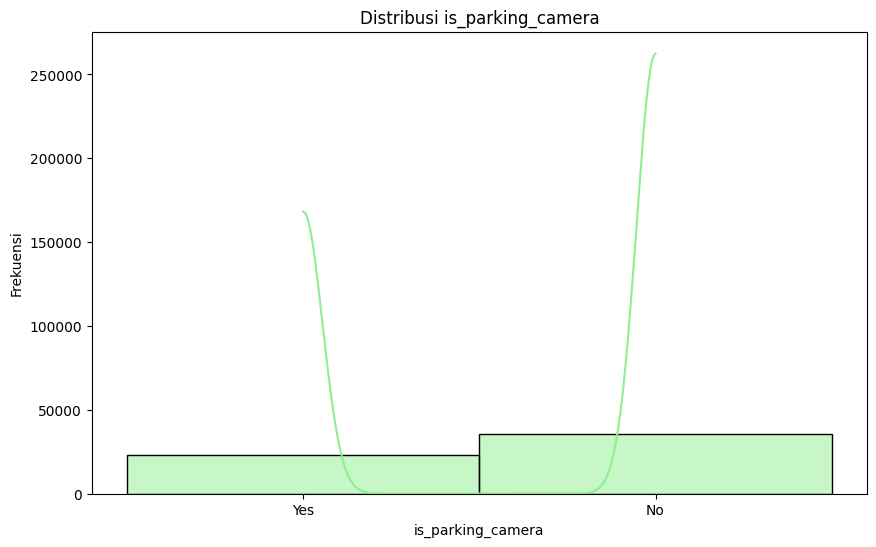

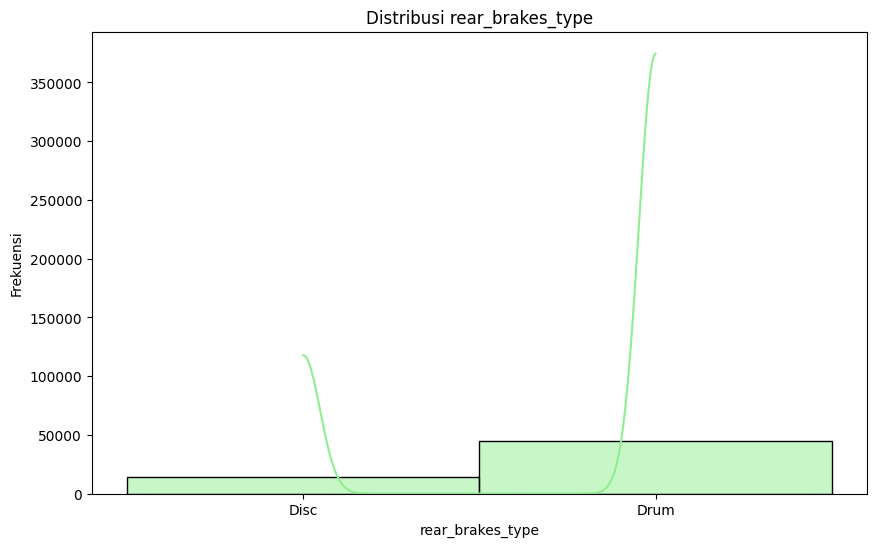

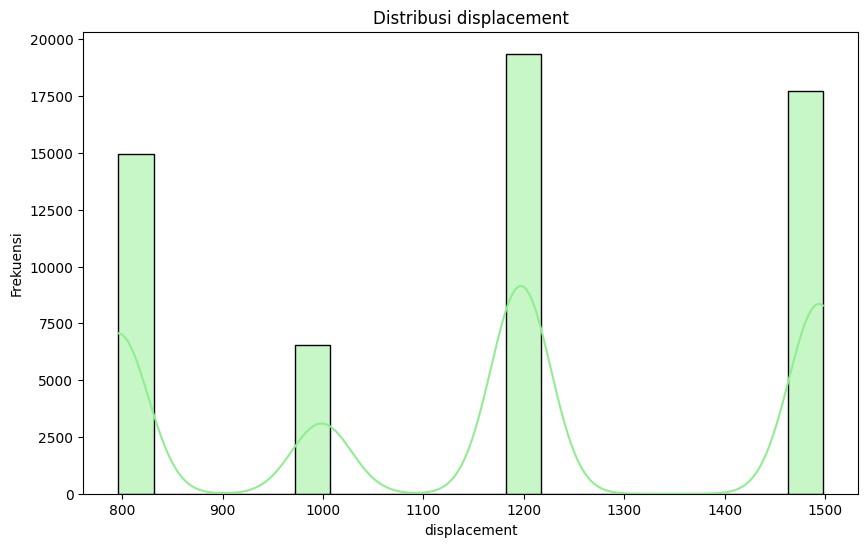

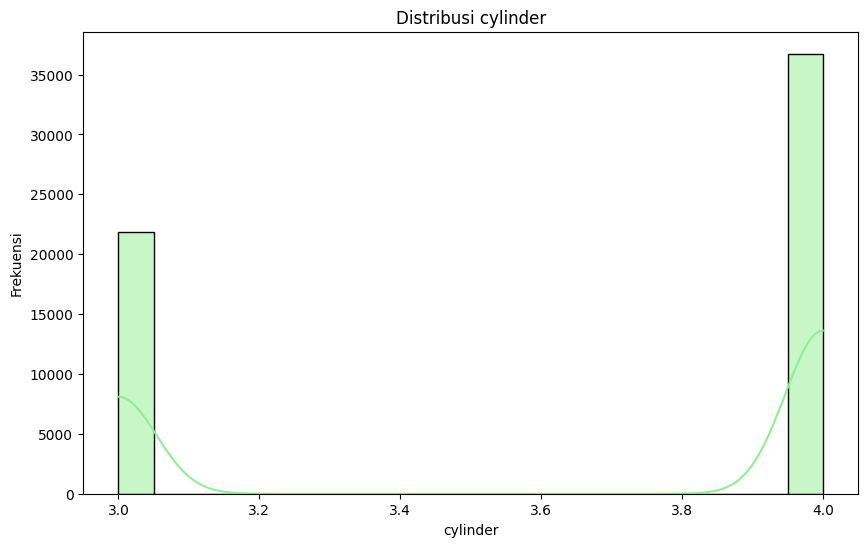

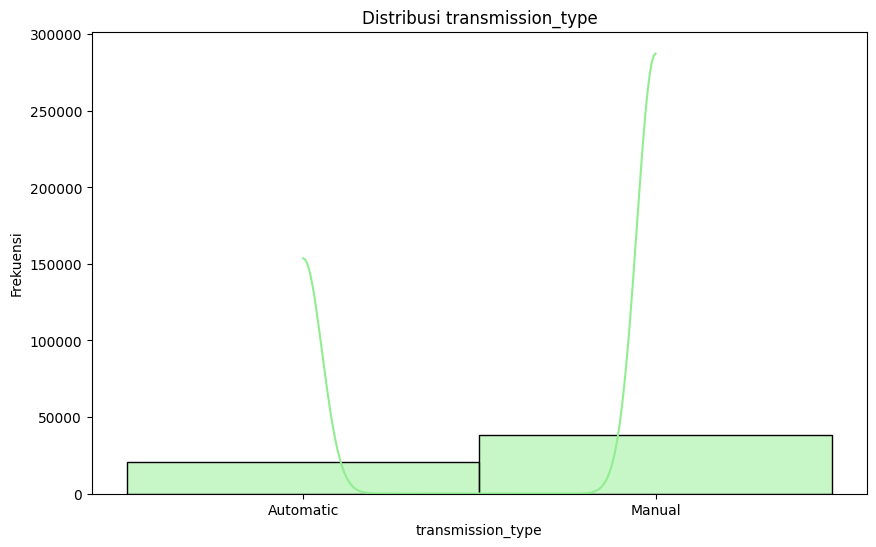

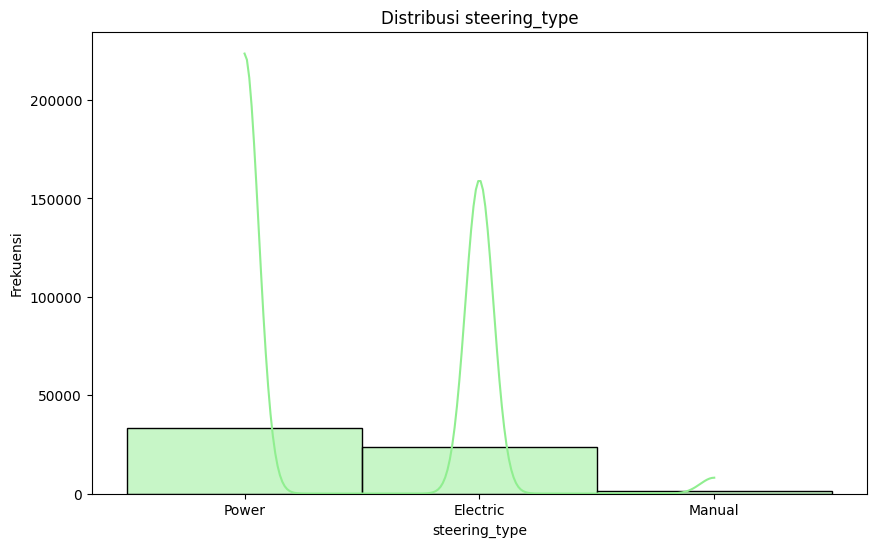

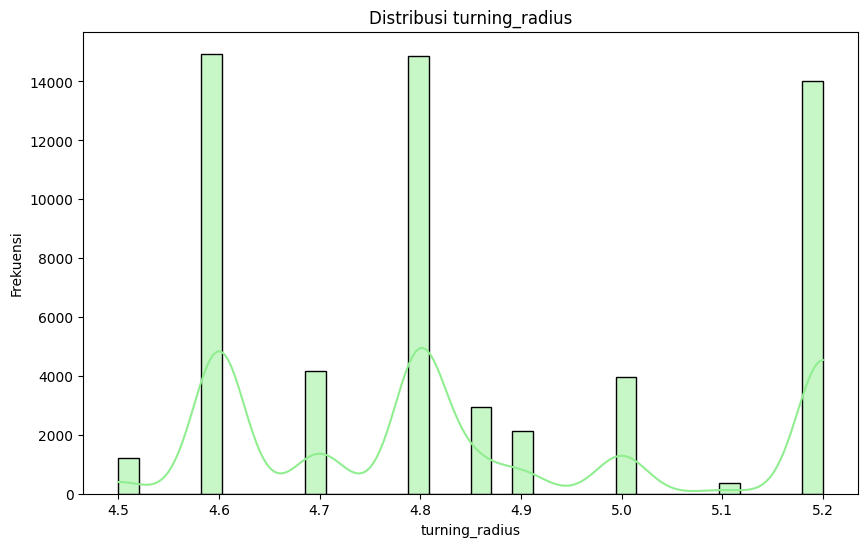

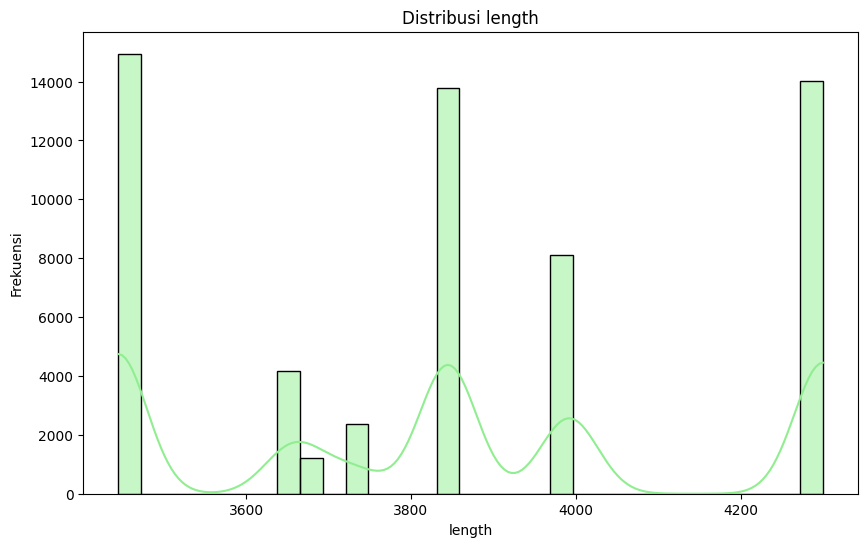

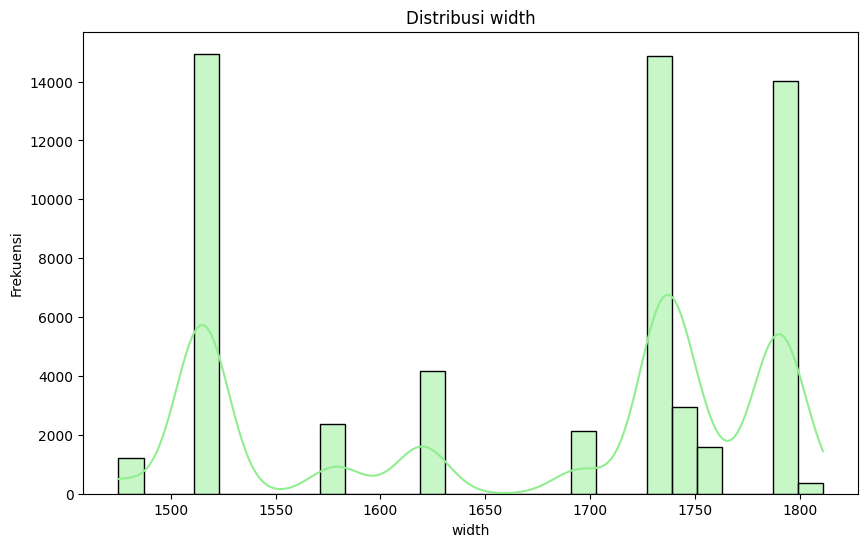

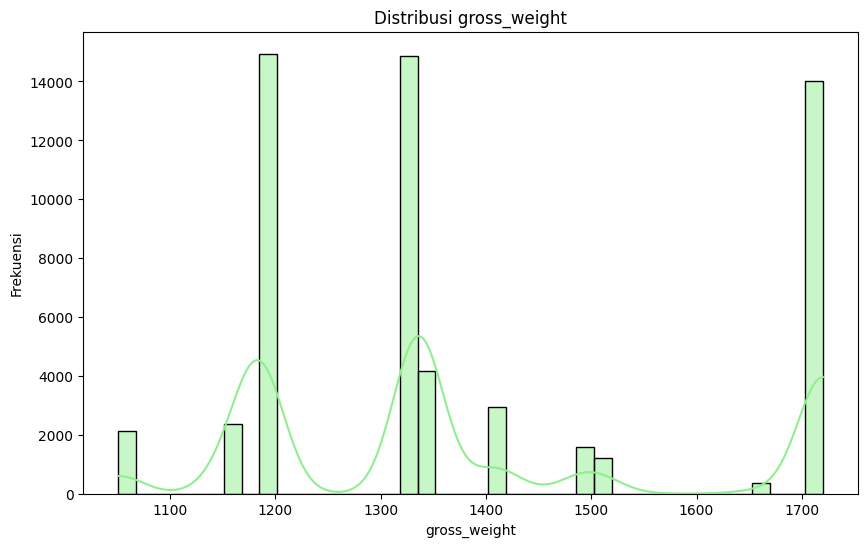

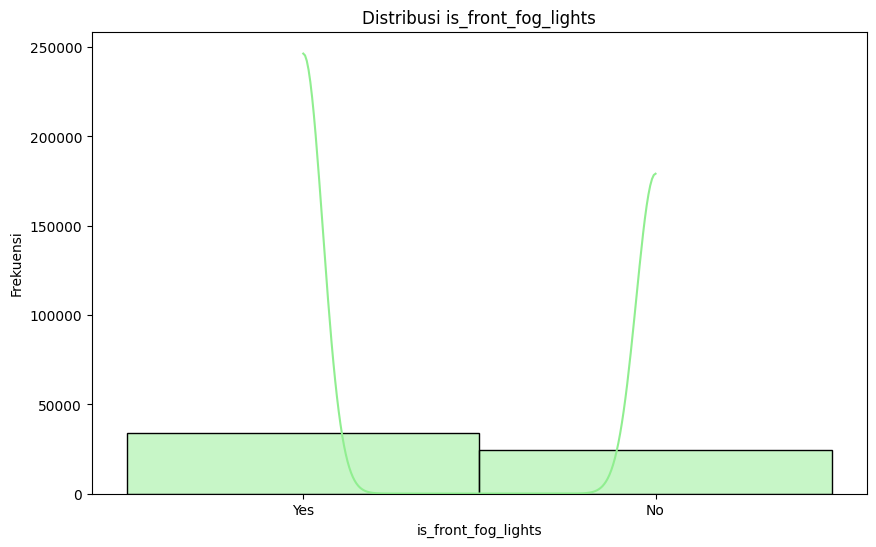

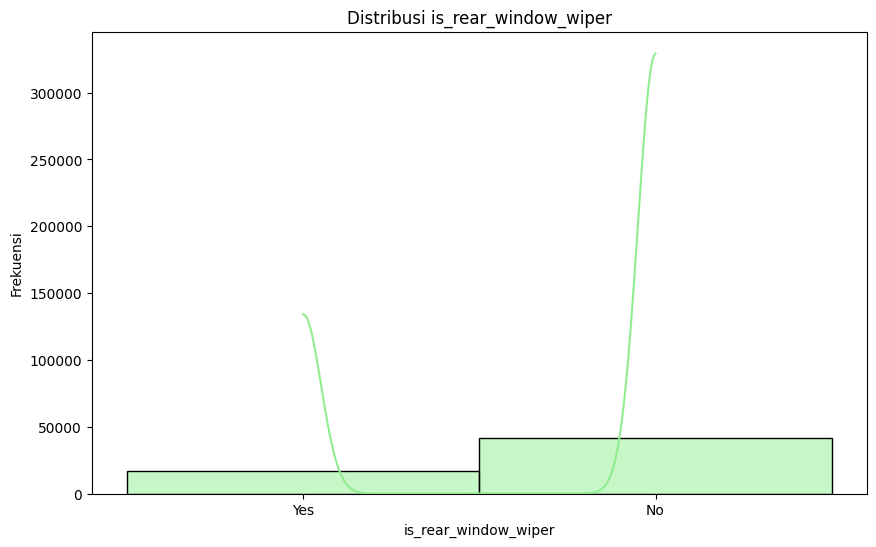

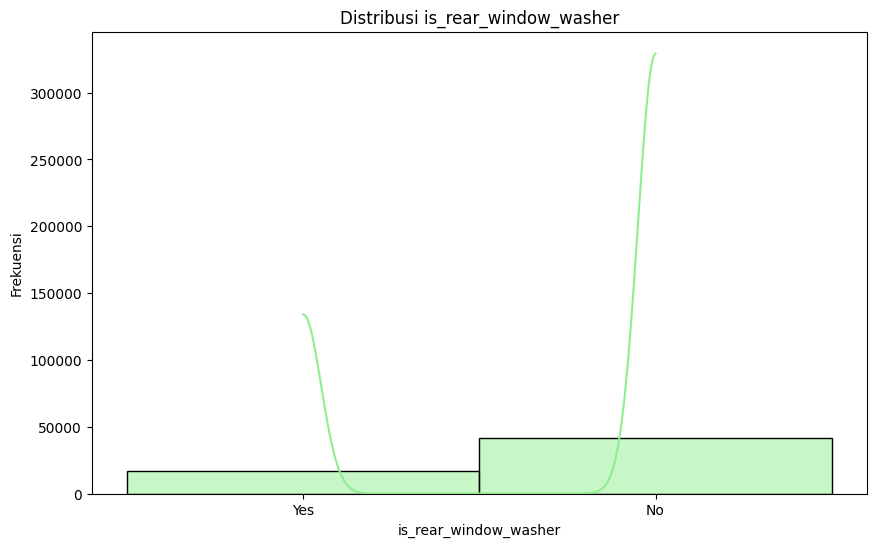

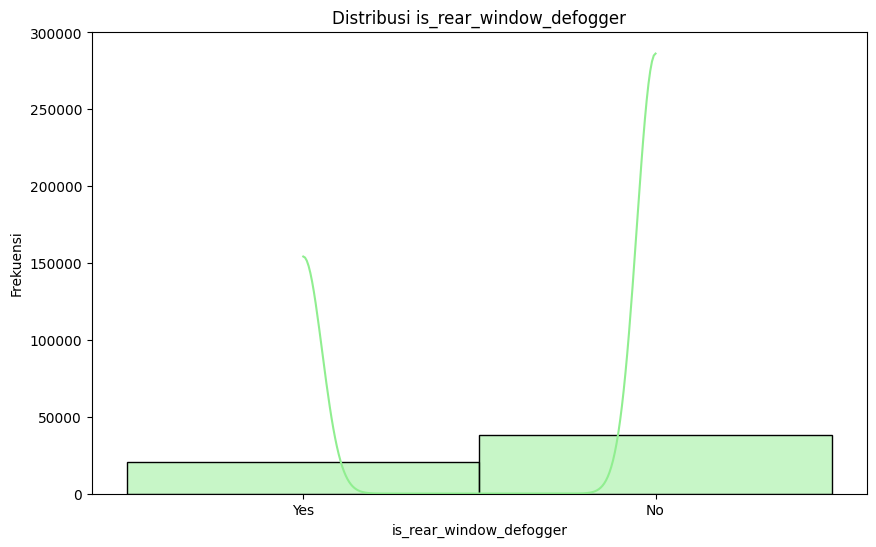

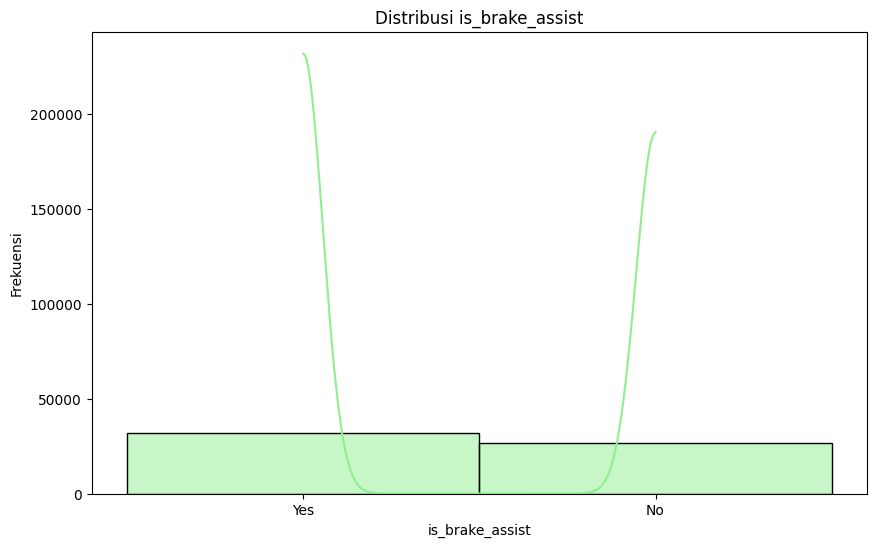

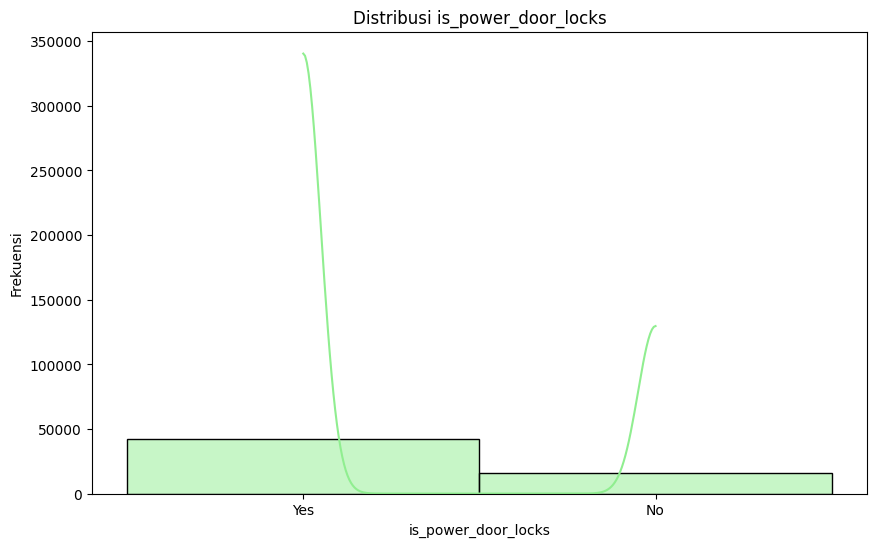

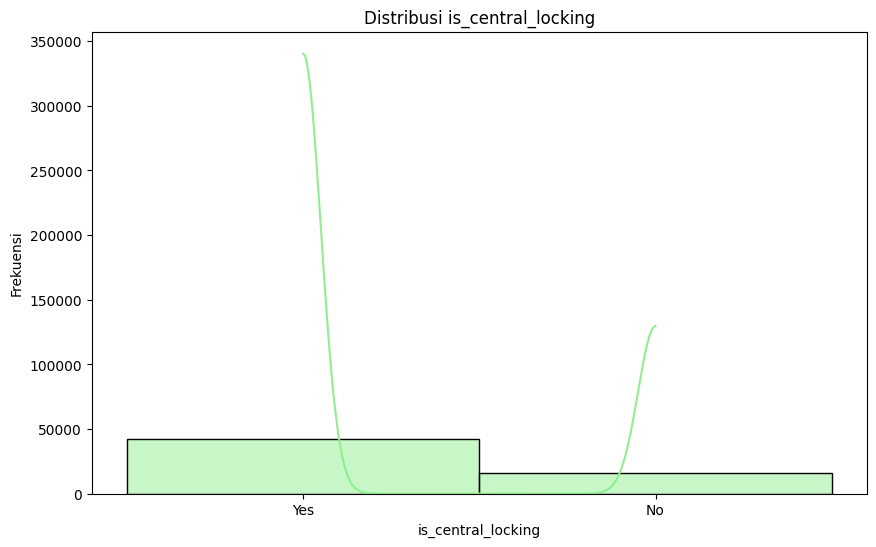

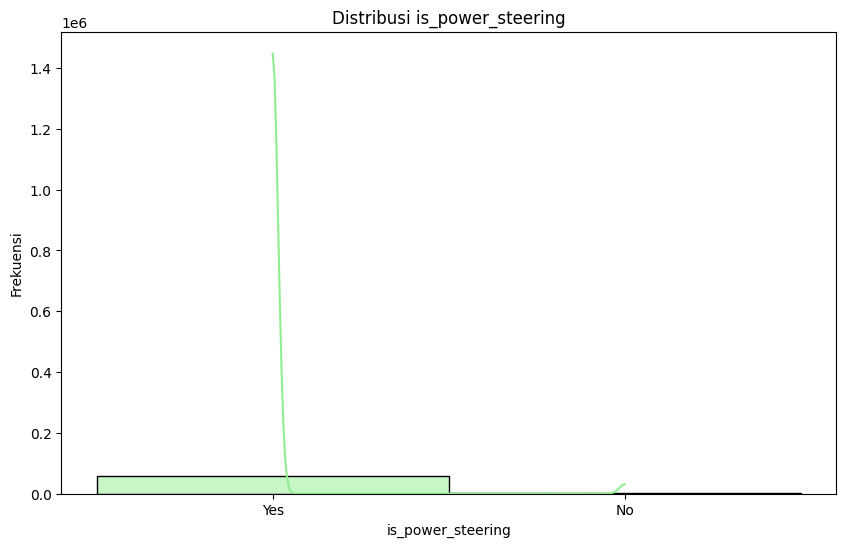

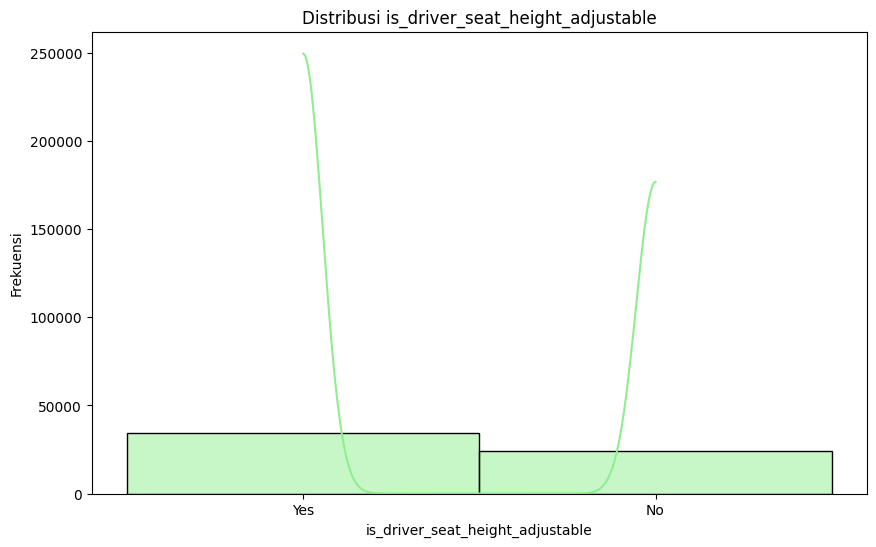

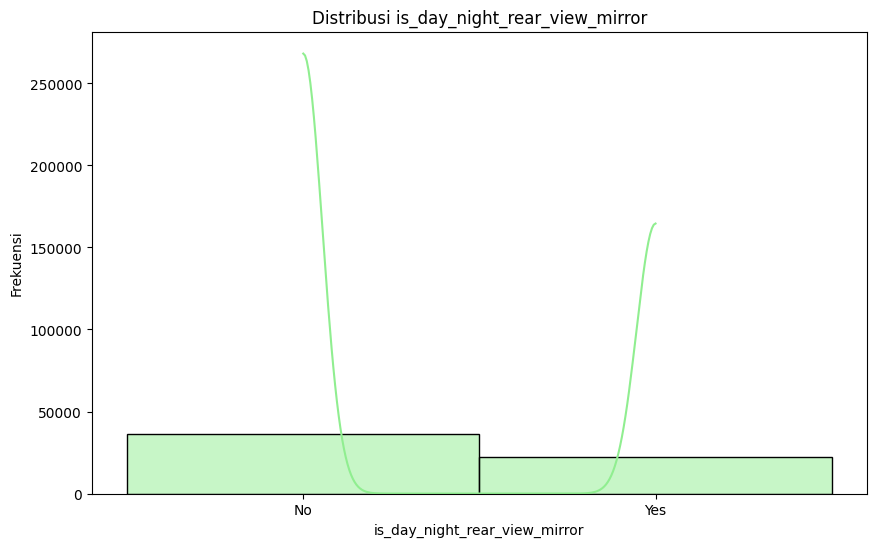

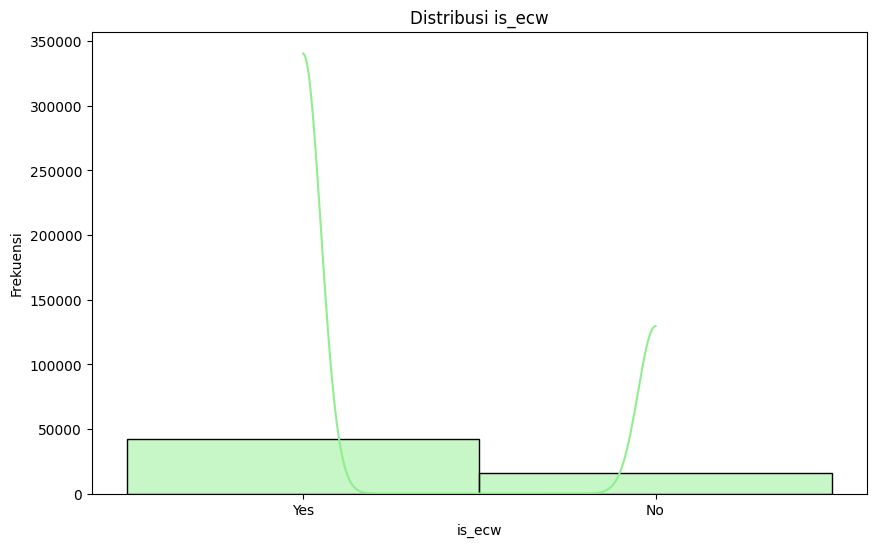

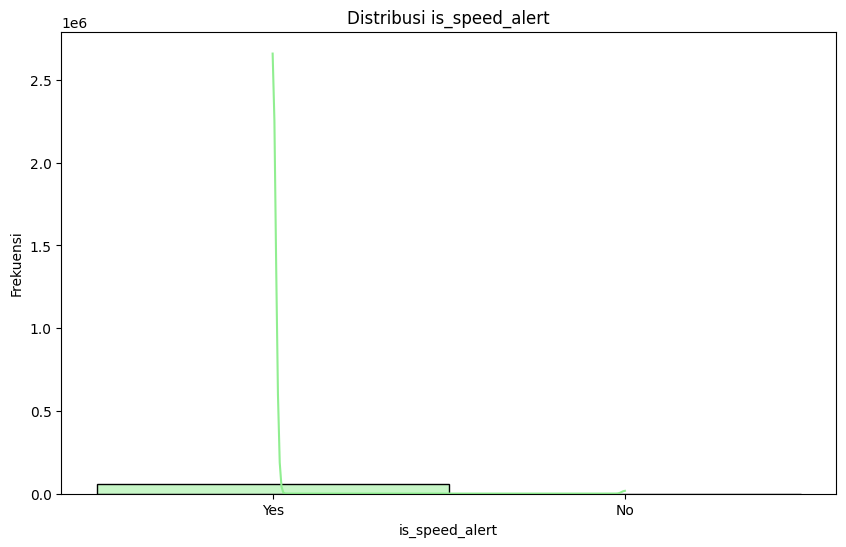

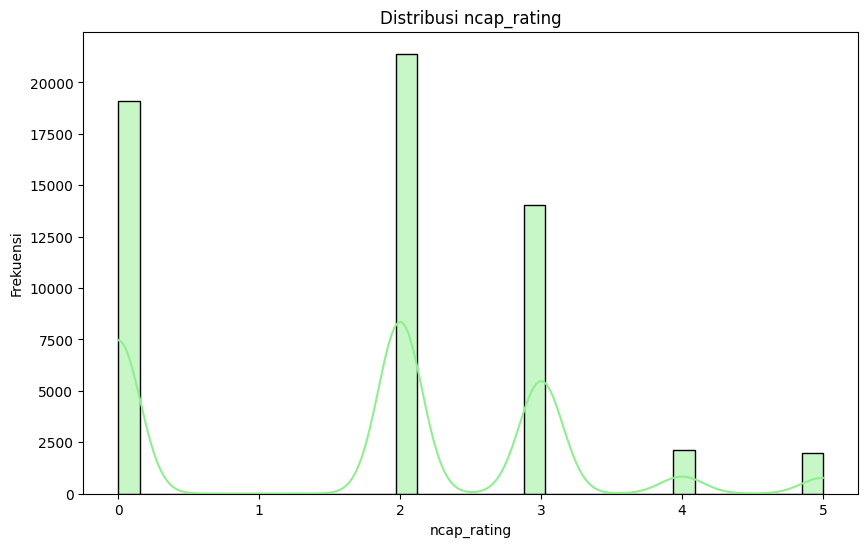

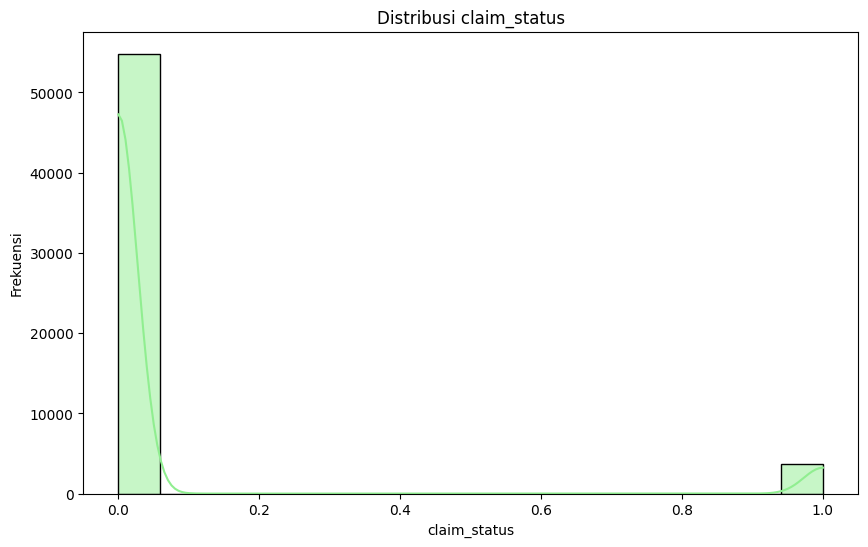

In [21]:
# cek distribusi data
print('Cek Distribusi Data')
for feature in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[feature], color='lightgreen', kde=True)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.show()

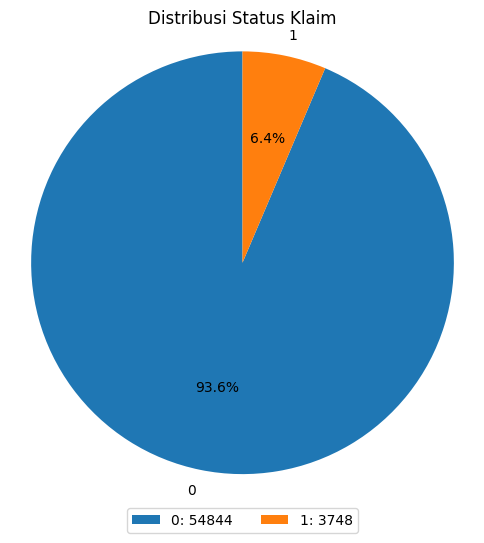

In [22]:
# Hitung jumlah per kategori
jumlah_per_status = df['claim_status'].value_counts()

# Buat pie chart
plt.figure(figsize=(6,6))
plt.pie(jumlah_per_status, labels=jumlah_per_status.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Status Klaim')
plt.axis('equal')  # supaya pie chart bulat sempurna

# Buat legend dengan nama + jumlah data (count)
labels_legend = [f"{cat}: {count}" for cat, count in zip(jumlah_per_status.index, jumlah_per_status.values)]
plt.legend(labels_legend, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(jumlah_per_status))

plt.show()

- Hubungan jumlah data di setiap fitur berdasarkan claim status

- Fitur Numerik

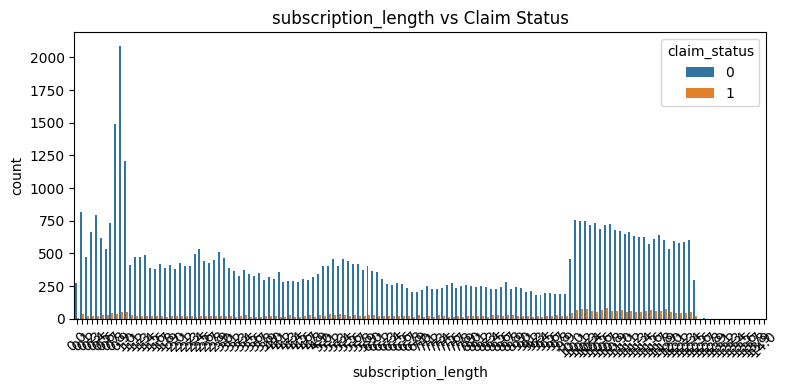

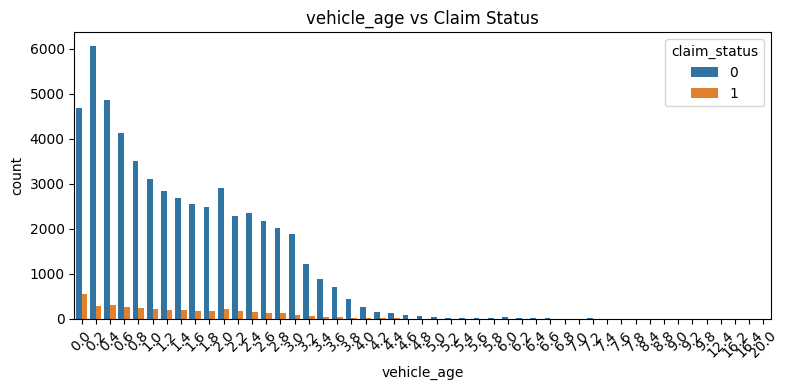

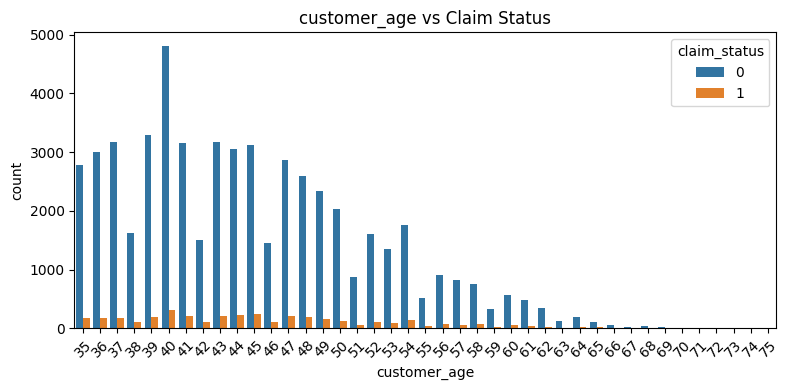

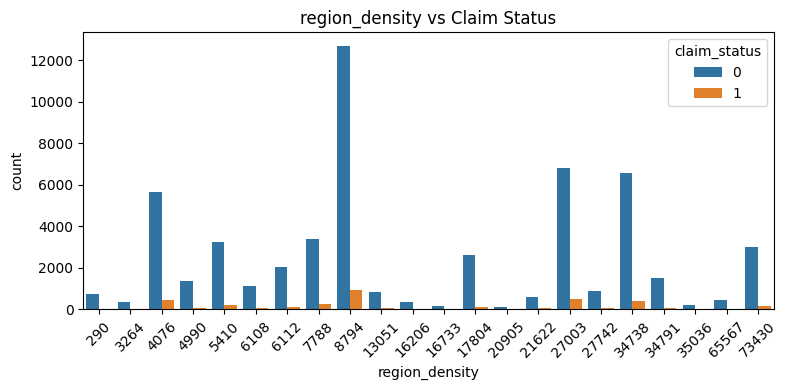

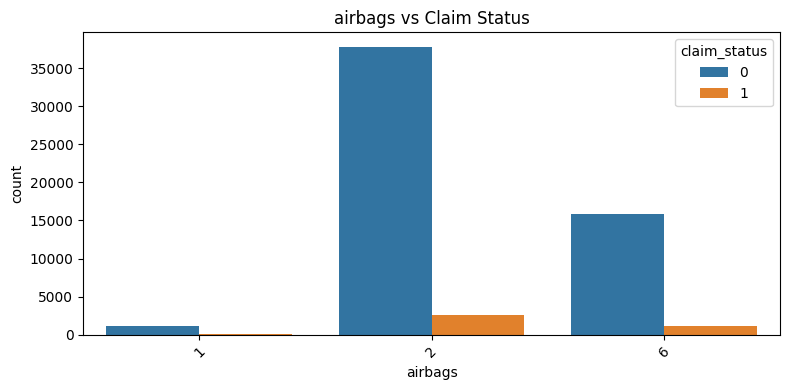

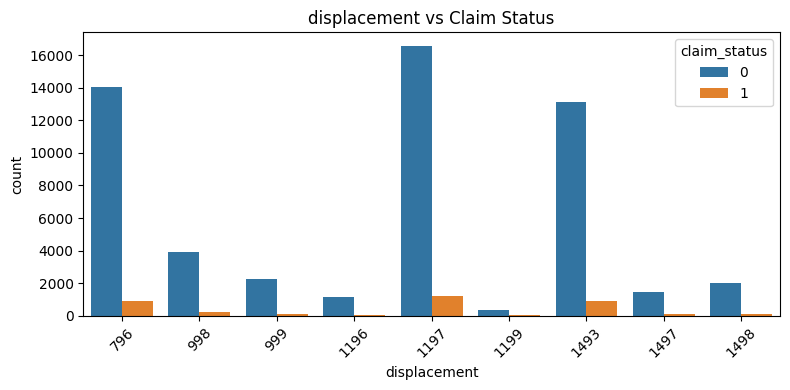

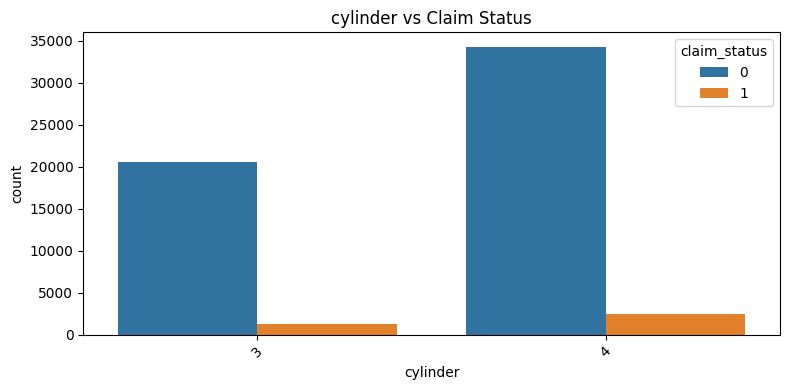

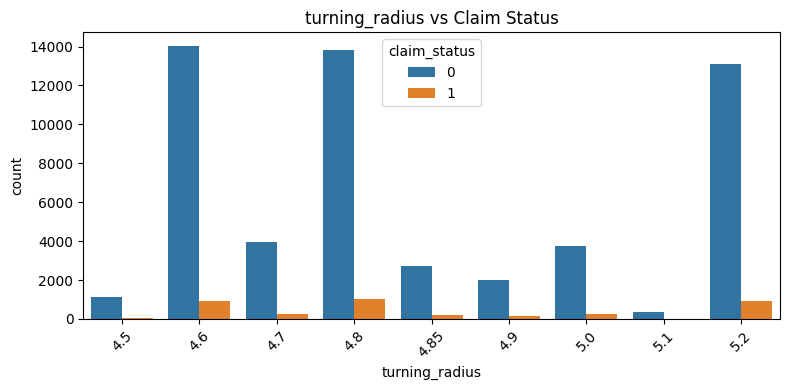

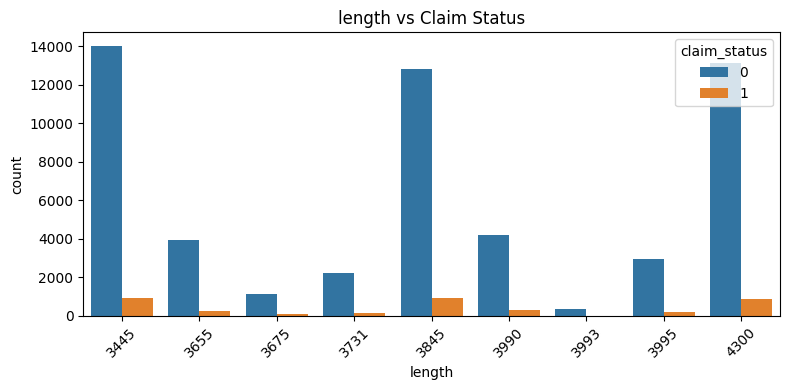

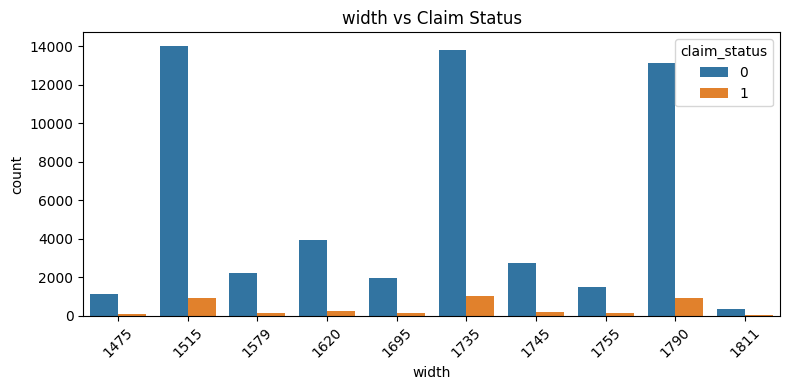

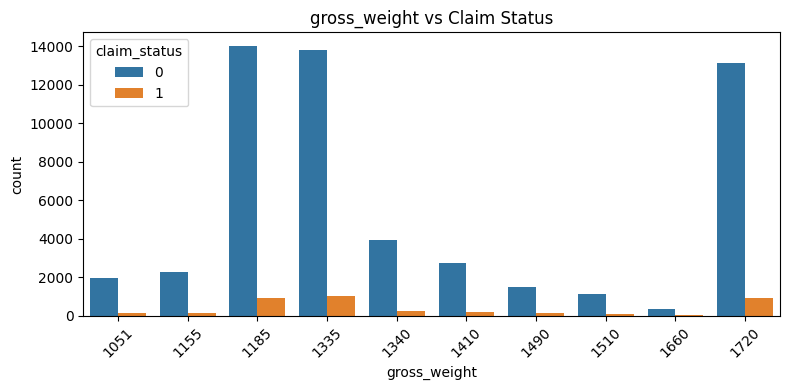

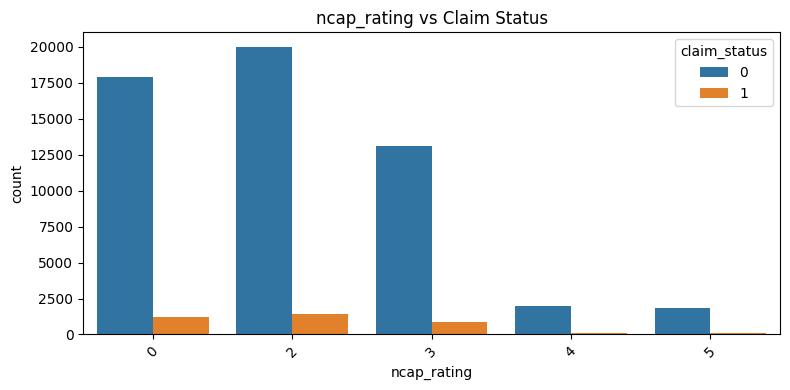

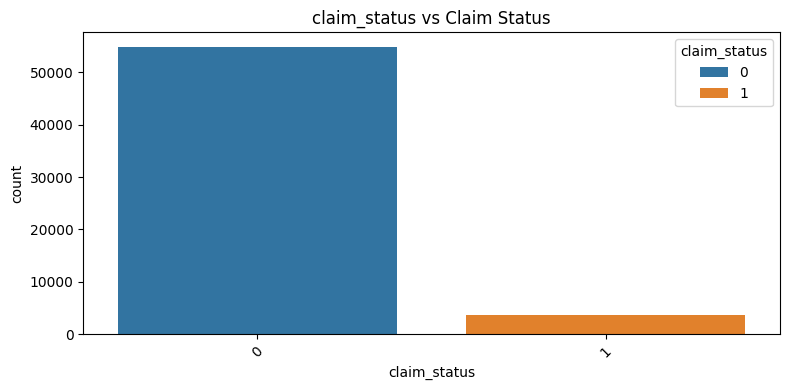

In [23]:
numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='claim_status')
    plt.title(f"{col} vs Claim Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- Fitur Kategori

<ipython-input-24-ba34011f047e>:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


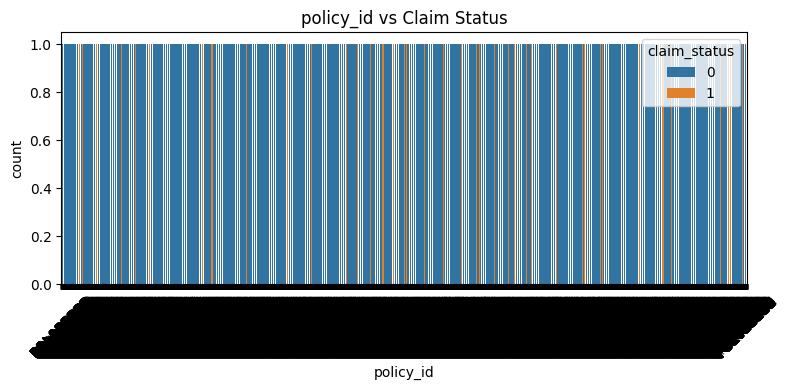

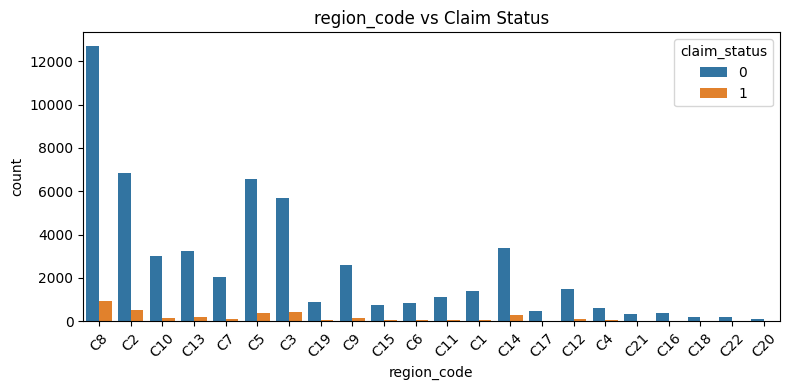

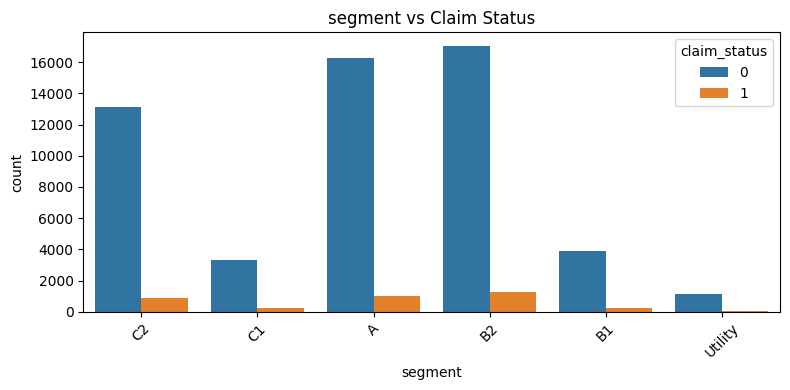

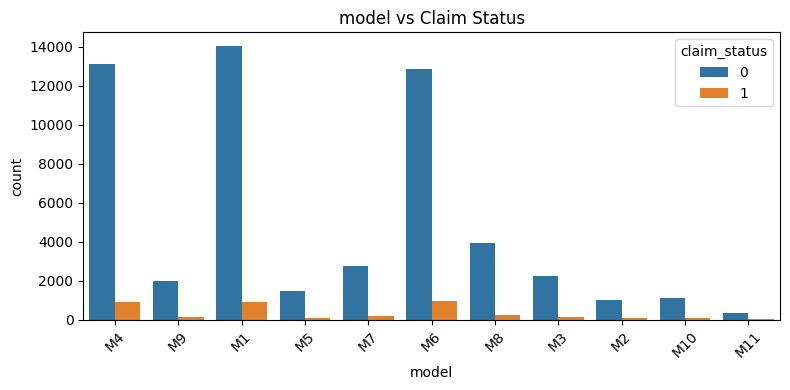

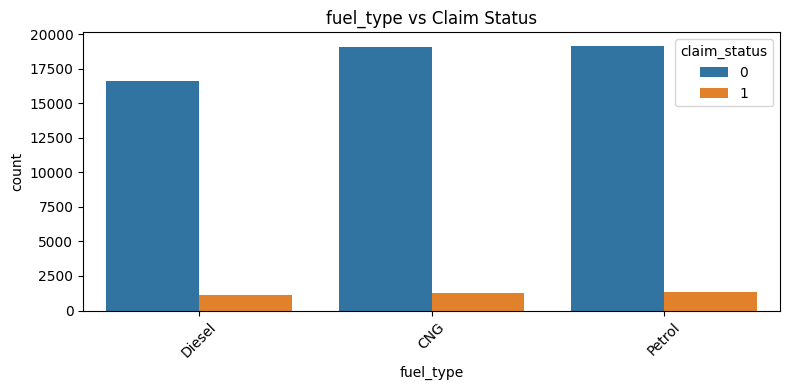

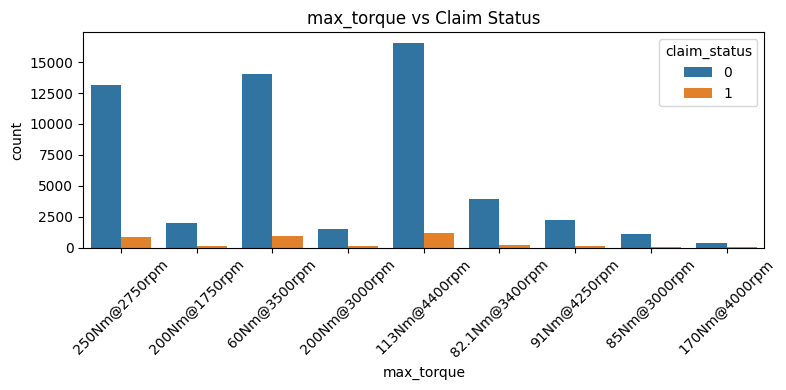

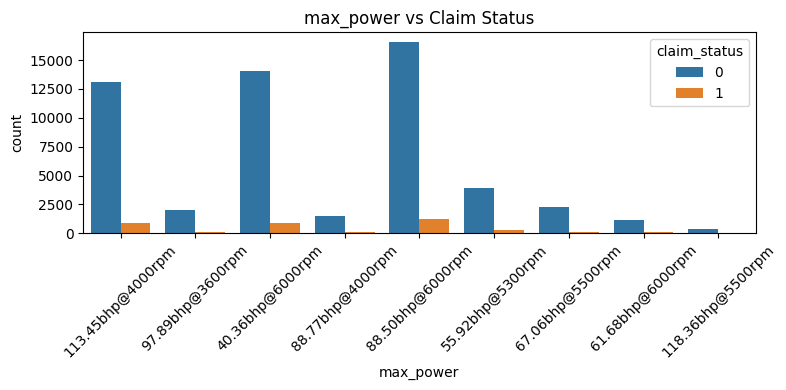

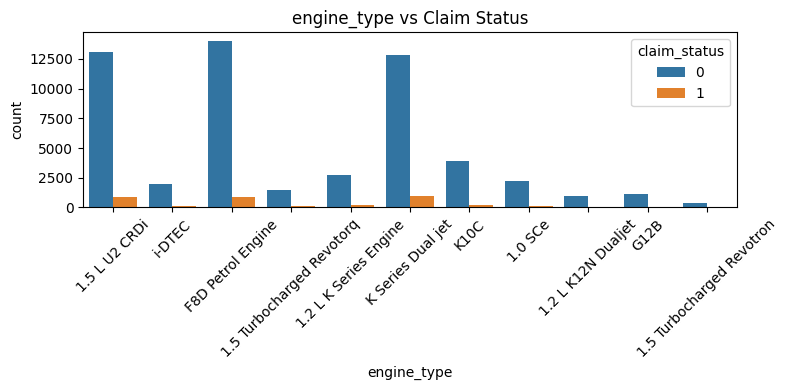

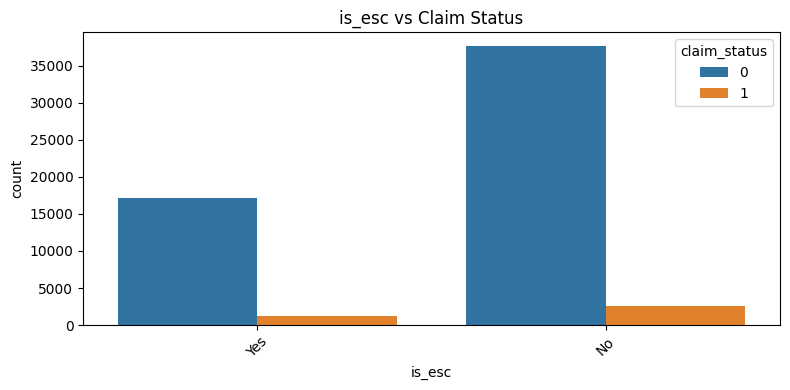

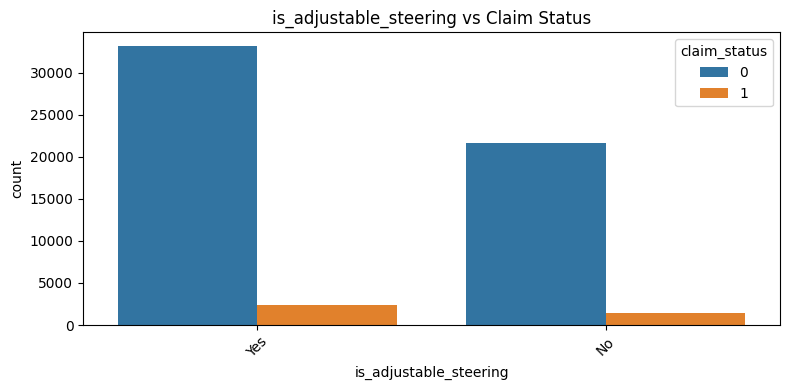

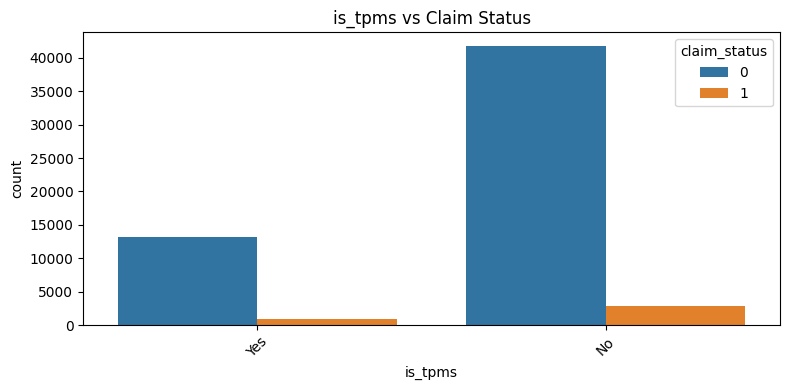

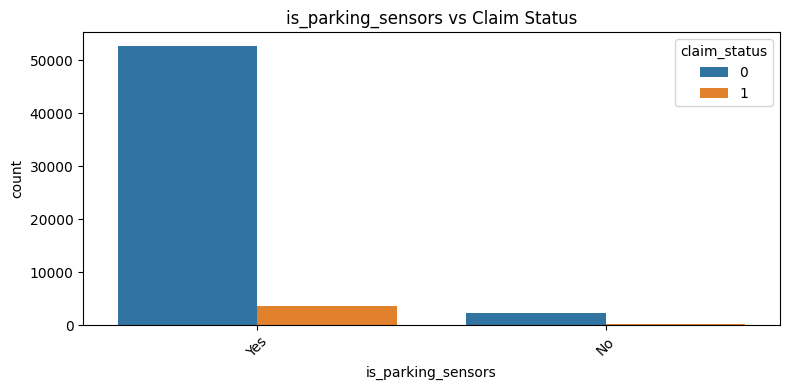

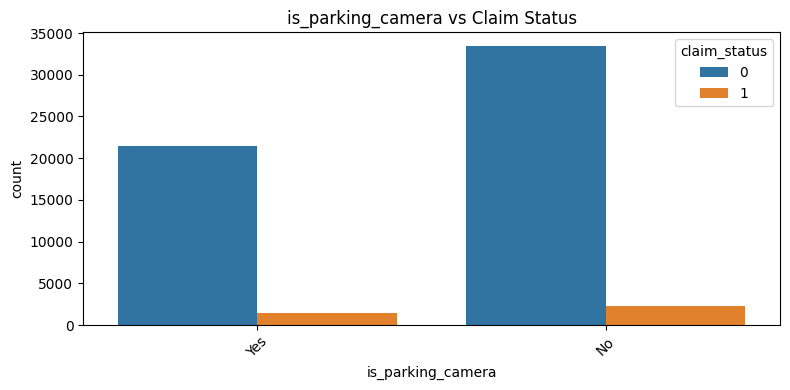

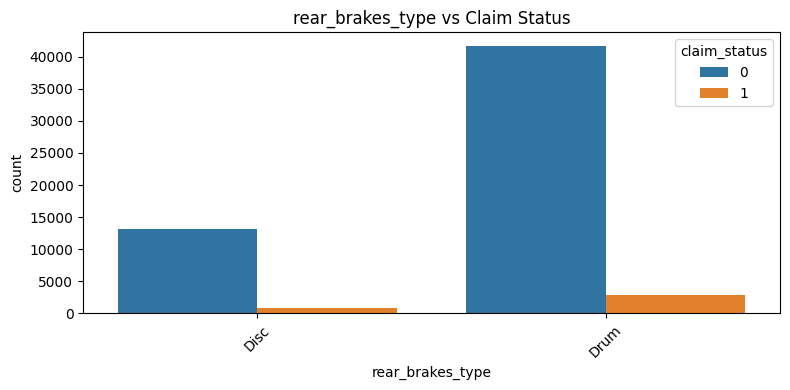

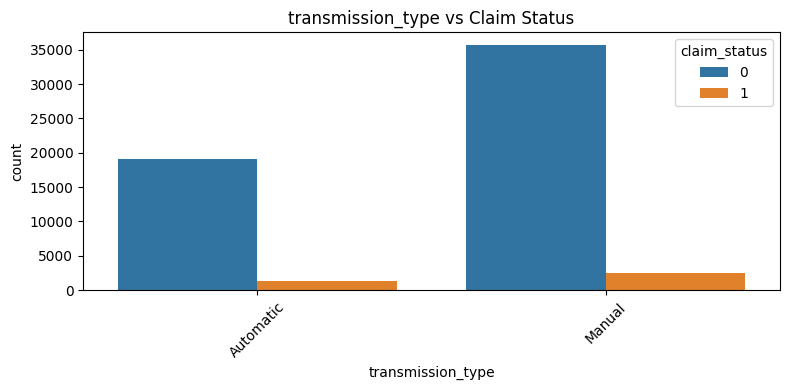

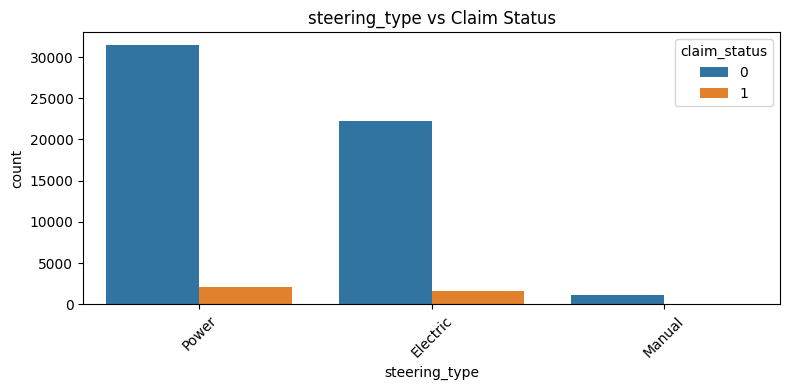

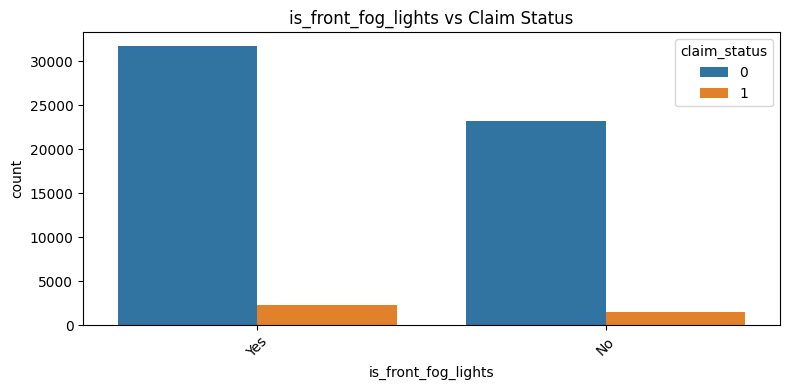

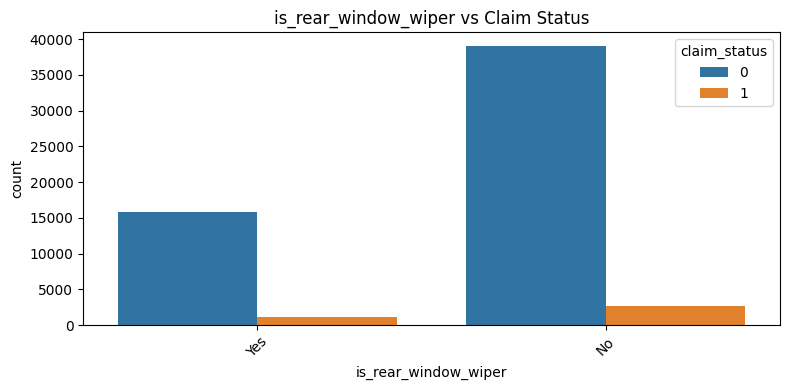

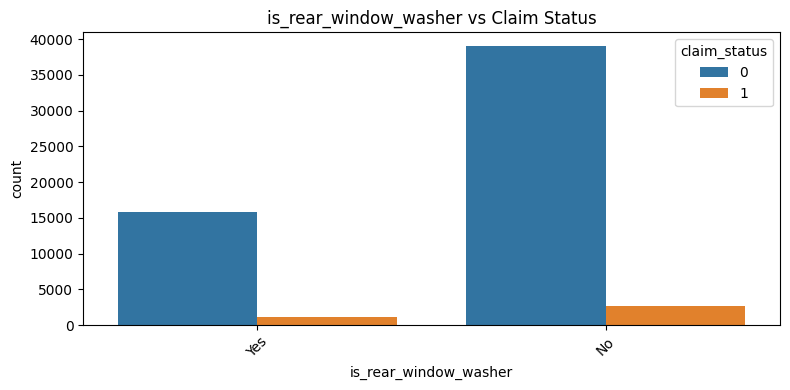

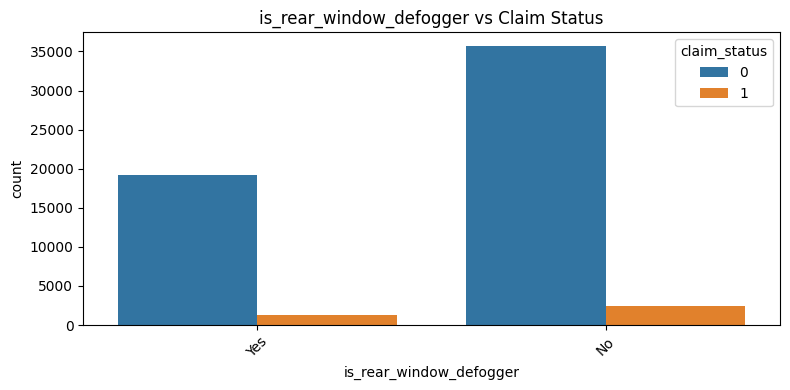

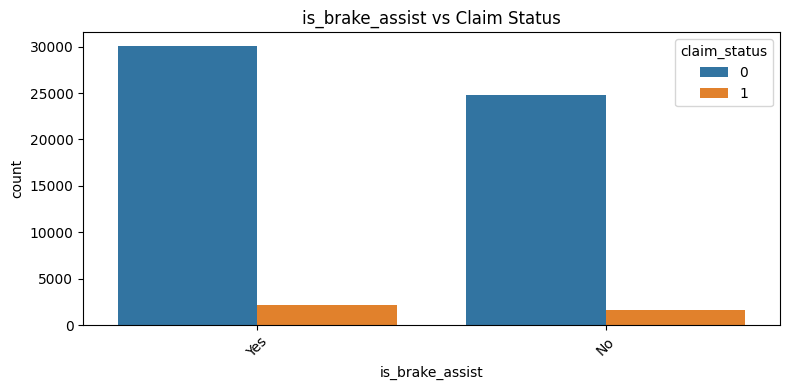

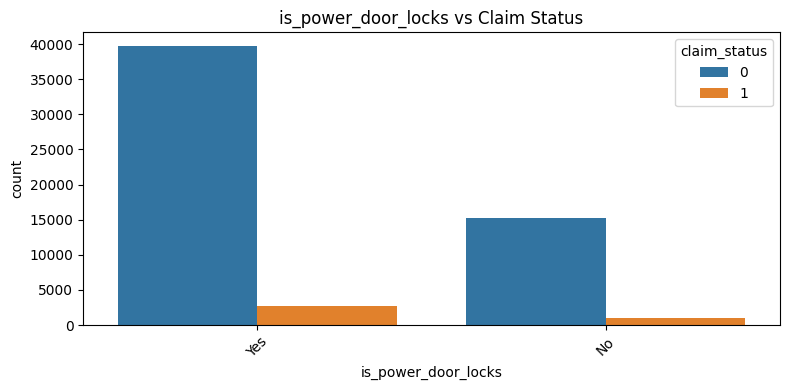

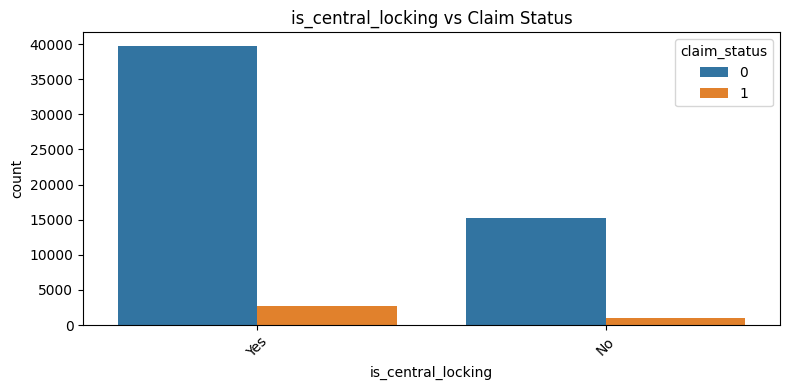

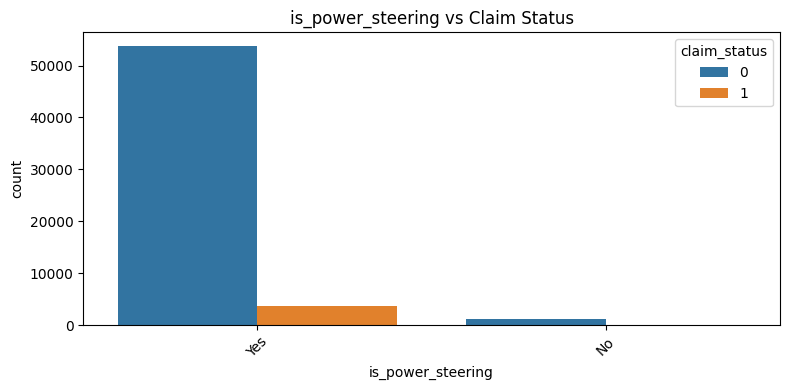

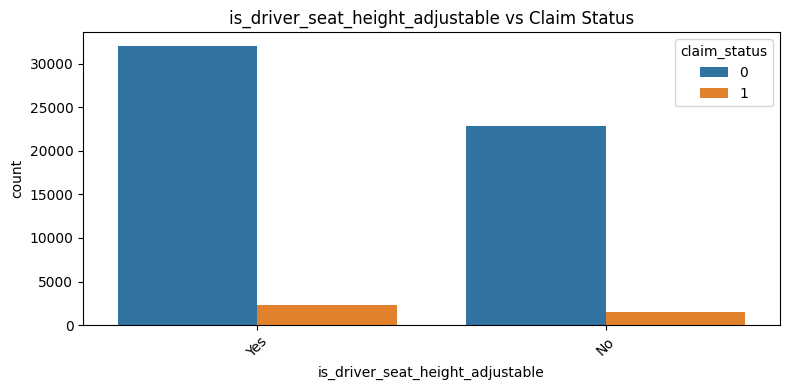

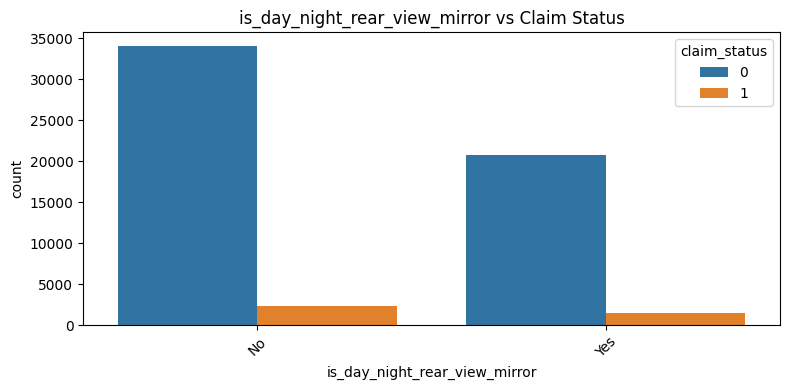

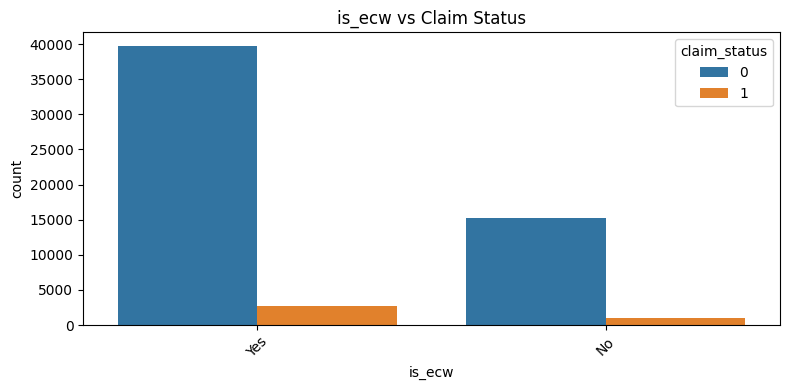

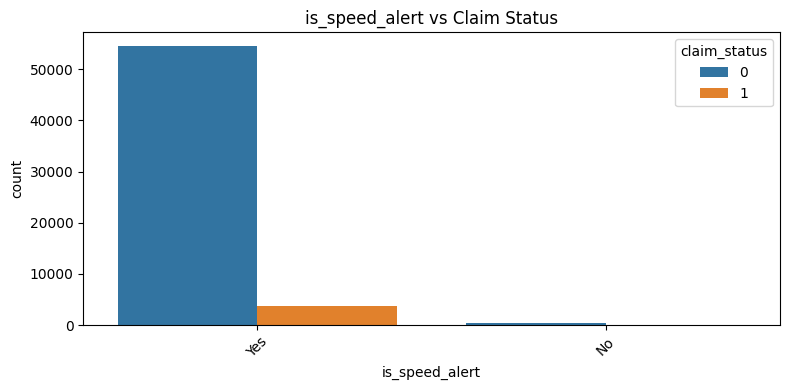

In [24]:
for col in kategori:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='claim_status')
    plt.title(f"{col} vs Claim Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

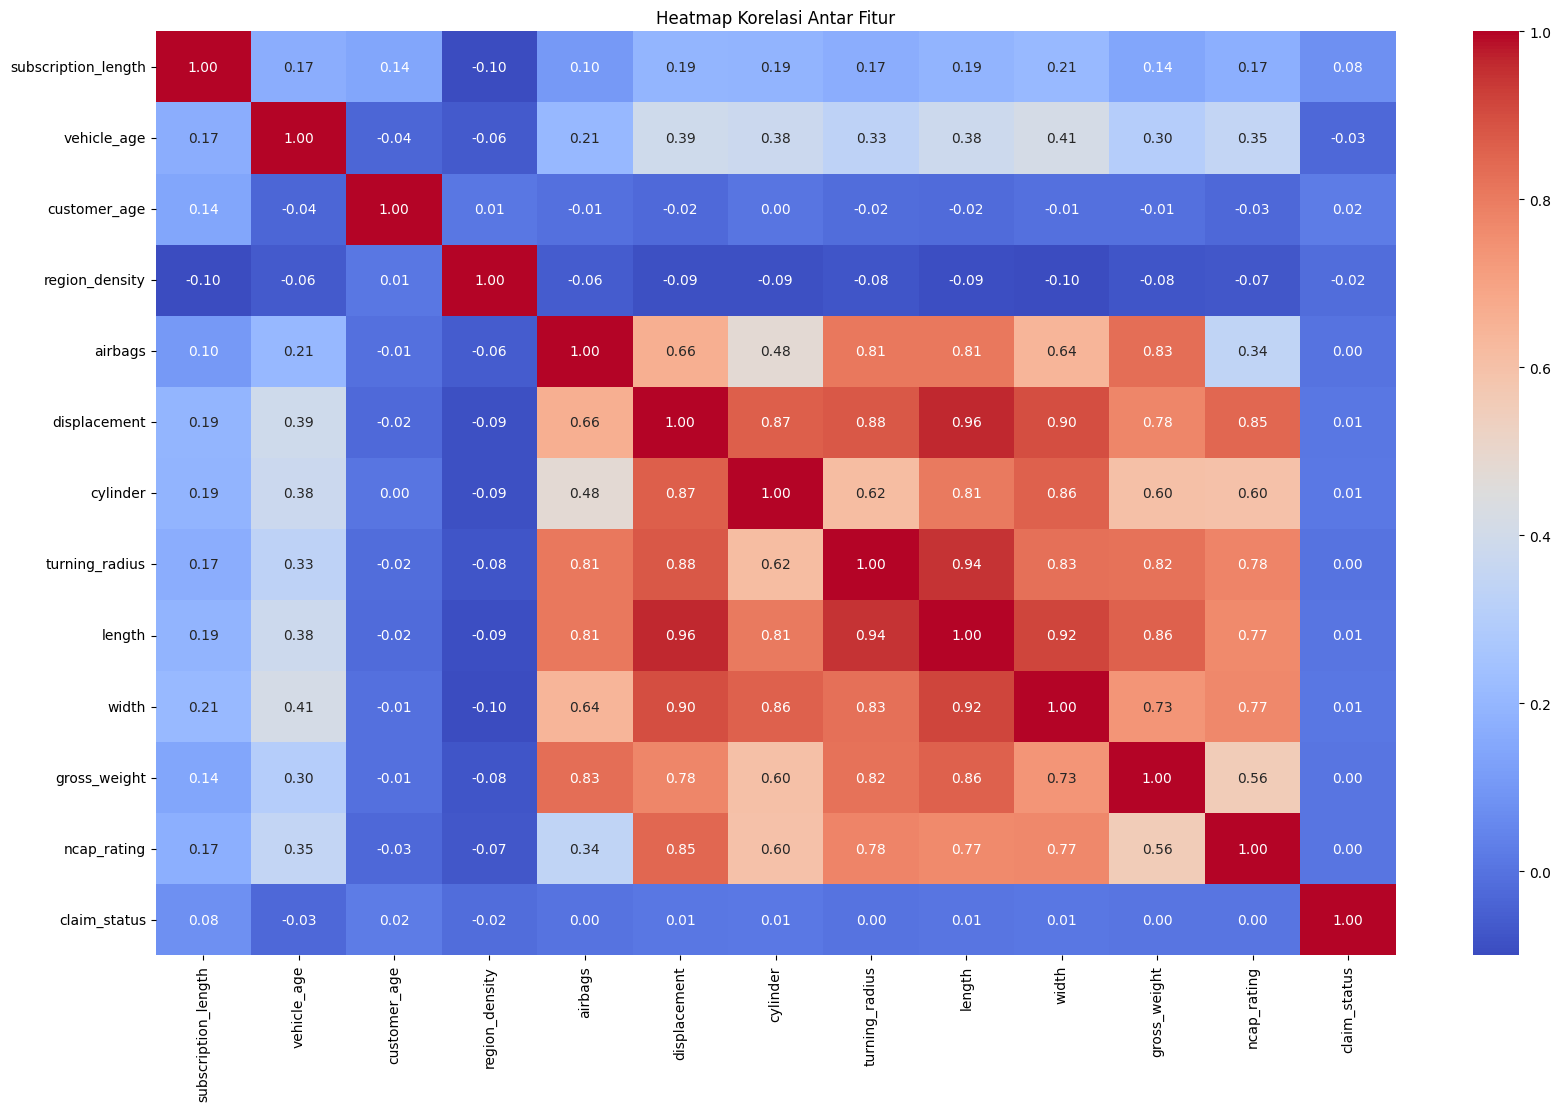

In [25]:
# Filter hanya kolom numerik
numeric_columns = df.select_dtypes(include=[np.number])

# Korelasi antar Fitur
plt.figure(figsize=(20, 12))
sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

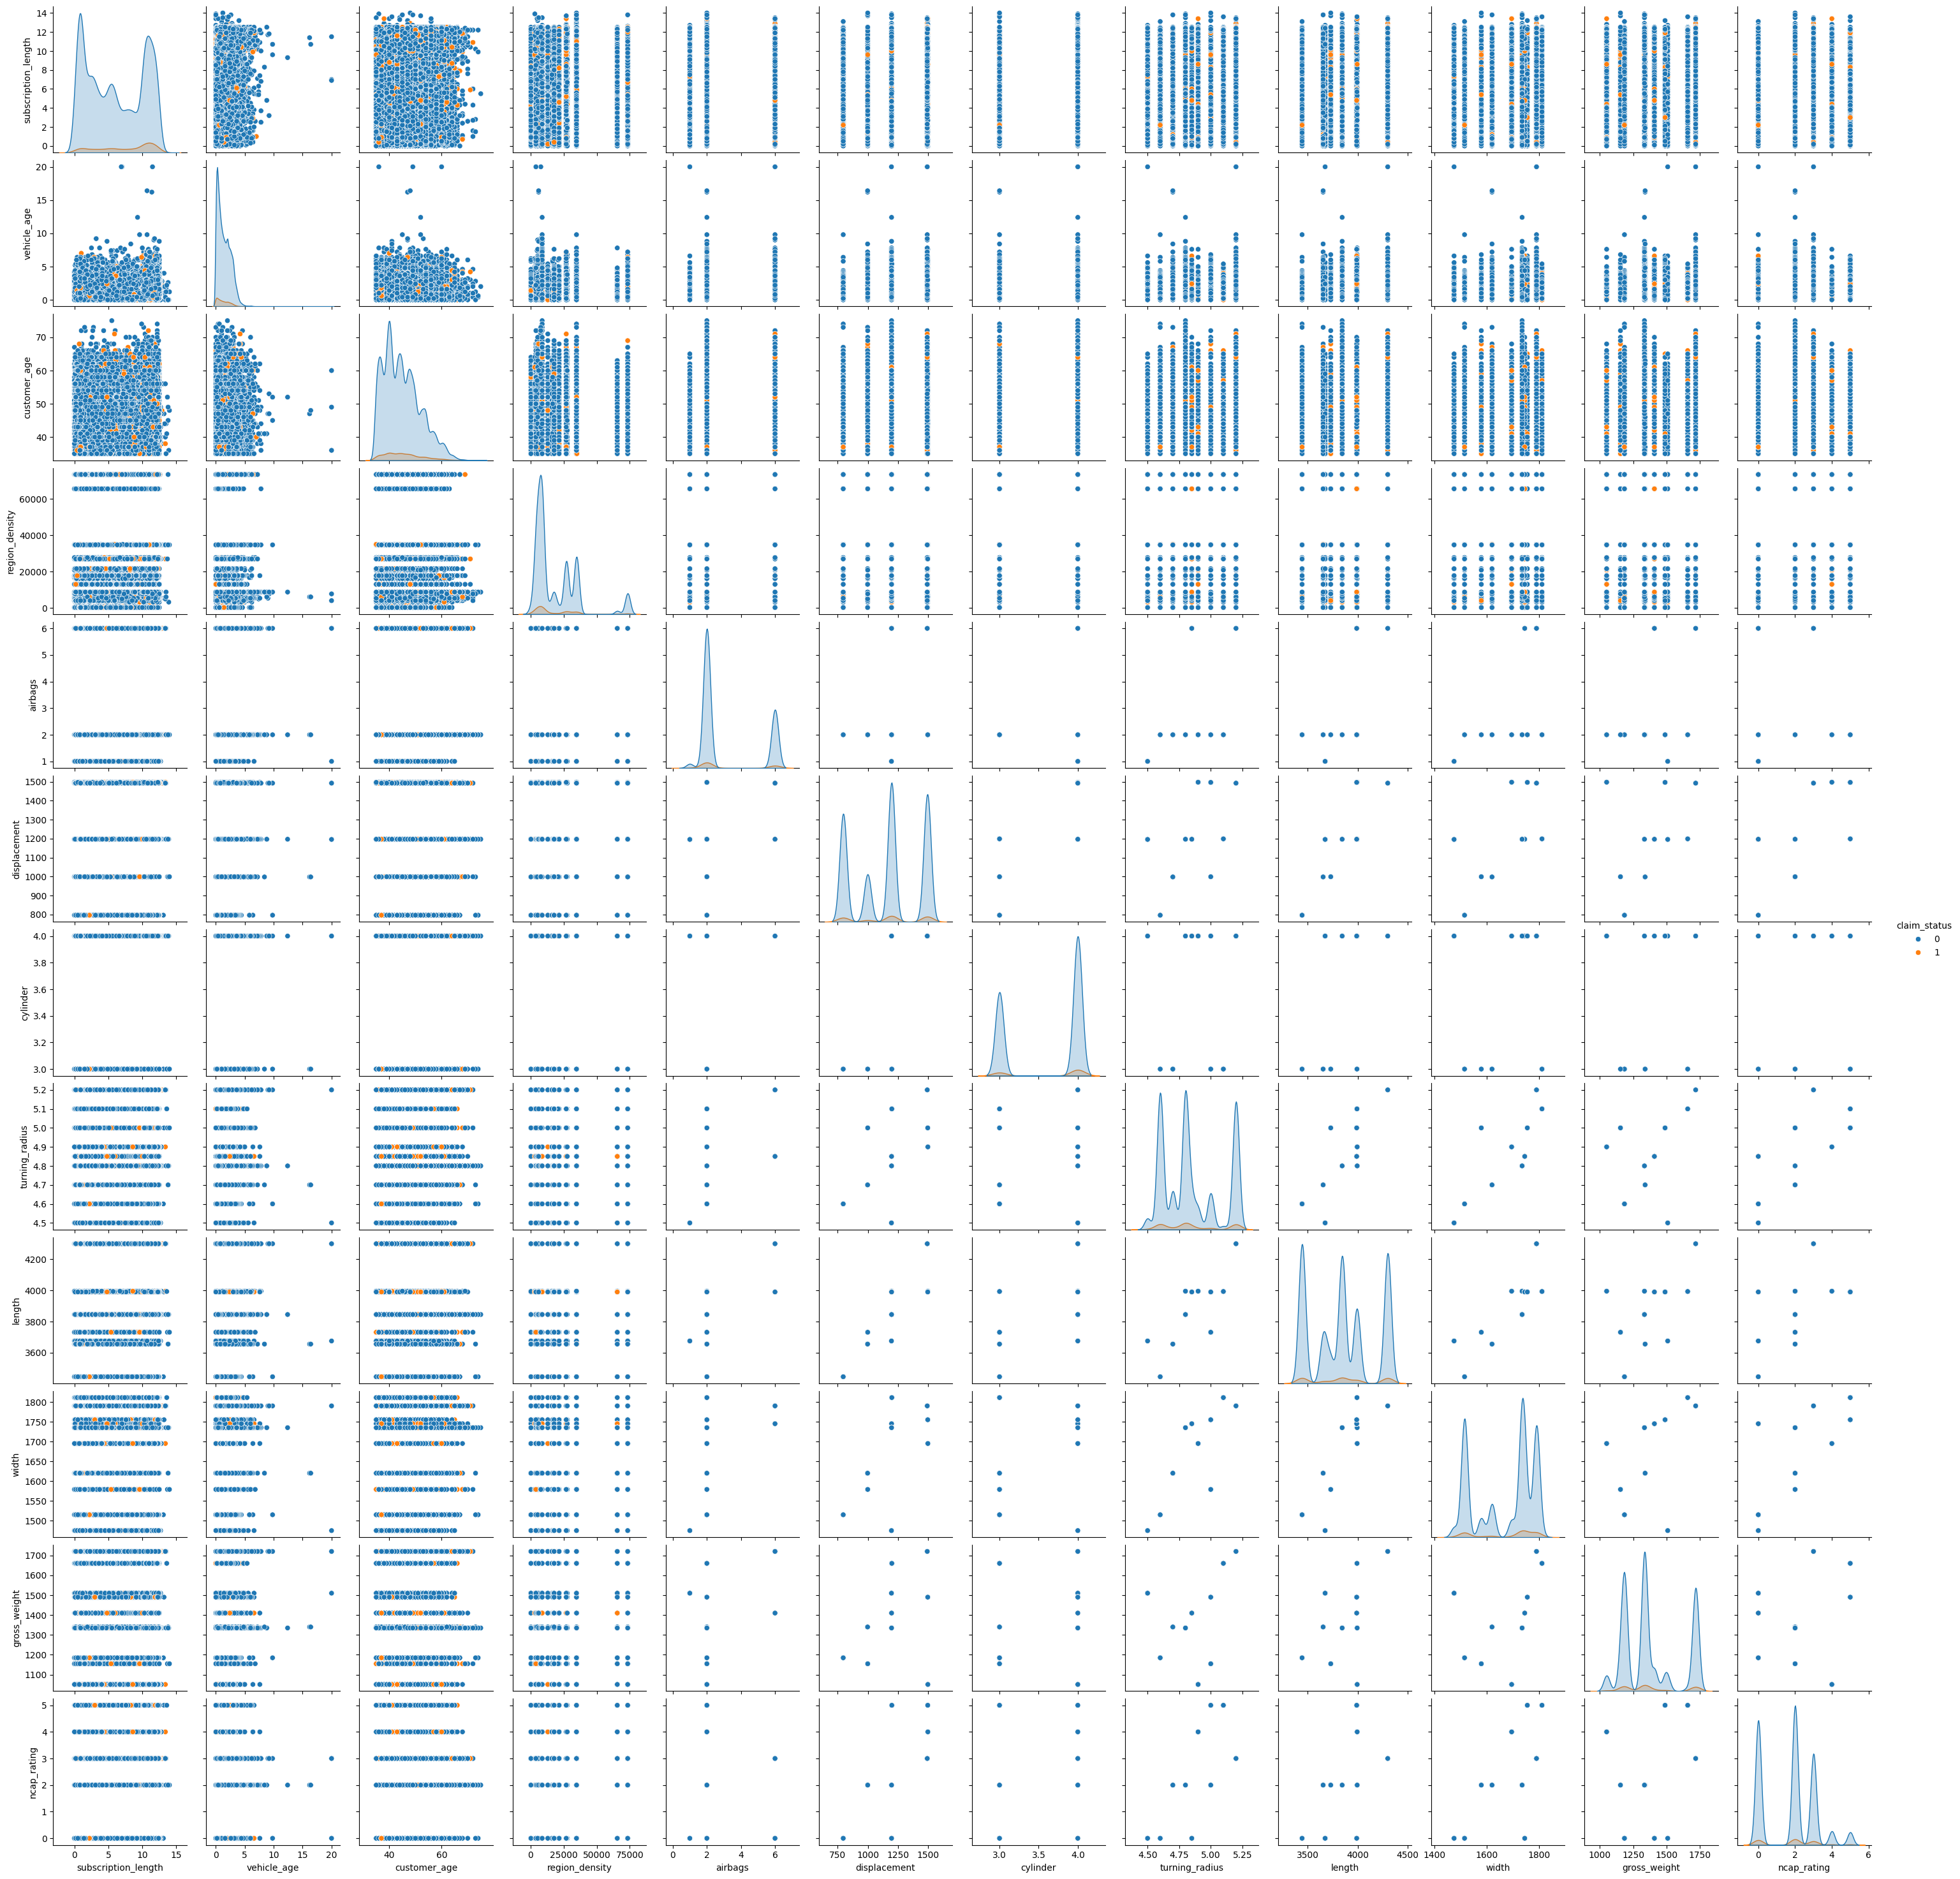

In [26]:
# Persebaran nilai label antara korelasi kolom numerik
sns.pairplot(data=df, hue="claim_status")

## Data Preparation / Preprocessing

In [27]:
# Pisahkan kolom numerik dan kategorikal
numerical_columns = []
object_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        object_columns.append(col)
    else:
        numerical_columns.append(col)

In [28]:
# Pisahkan fitur numerik dan kategorikal
numerical_df = df[numerical_columns]
categorical_df = df[object_columns].drop('policy_id', axis=1)

## Encoding data category

In [29]:
# Encode kolom kategorikal
label_encoder = LabelEncoder()
for col in categorical_df.columns:
    categorical_df[col] = label_encoder.fit_transform(categorical_df[col])

In [30]:
# Gabungkan kembali fitur
X = pd.concat([numerical_df, categorical_df], axis=1)
y = df['claim_status']
X.drop(['claim_status'], axis=1, inplace=True)

## Train test split dan evaluasi model

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [32]:
clfs = {
    'SVC': SVC(kernel='sigmoid', gamma=1.0),
    'KN': KNeighborsClassifier(),
    'NB': MultinomialNB(),
    'DT': DecisionTreeClassifier(max_depth=5),
    'LR': LogisticRegression(solver='liblinear', penalty='l1'),
    'RF': RandomForestClassifier(n_estimators=50, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=2),
    'BgC': BaggingClassifier(n_estimators=50, random_state=2),
    'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'GBDT': GradientBoostingClassifier(n_estimators=50, random_state=2),
    'xgb': XGBClassifier(n_estimators=50, random_state=2)
}

In [33]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred)

In [34]:
accuracy_scores = []
precision_scores = []
recall_scores = []

print("=" * 55)
print("{:<12} | {:<10} | {:<10} | {:<10}".format("Model", "Accuracy", "Precision", "Recall"))
print("-" * 55)

for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)

    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)

    print("{:<12} | {:<10.4f} | {:<10.4f} | {:<10.4f}".format(name, acc, prec, rec))

print("=" * 55)


Model        | Accuracy   | Precision  | Recall    
-------------------------------------------------------
SVC          | 0.9342     | 0.0000     | 0.0000    
KN           | 0.9311     | 0.0909     | 0.0052    
NB           | 0.4051     | 0.0659     | 0.6109    
DT           | 0.9341     | 0.0000     | 0.0000    
LR           | 0.9342     | 0.0000     | 0.0000    
RF           | 0.9264     | 0.0490     | 0.0065    
AdaBoost     | 0.9342     | 0.0000     | 0.0000    
BgC          | 0.9265     | 0.0408     | 0.0052    
ETC          | 0.9200     | 0.0489     | 0.0117    
GBDT         | 0.9342     | 0.0000     | 0.0000    
xgb          | 0.9342     | 0.0000     | 0.0000    


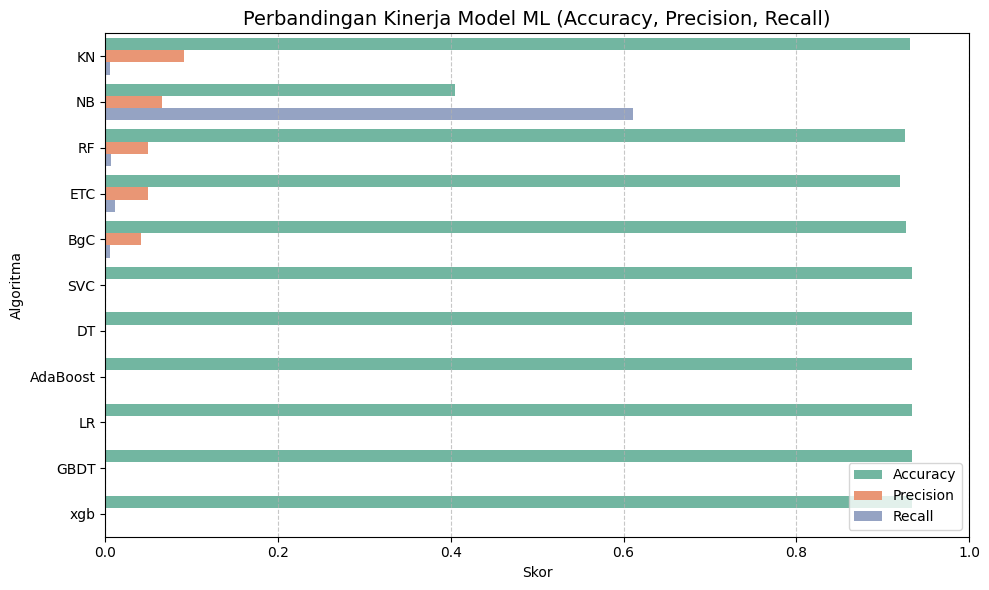

In [35]:
# Buat dataframe performa
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}).sort_values('Precision', ascending=False)

# Ubah ke format long (melt) untuk visualisasi
performance_df_melted = pd.melt(performance_df, id_vars='Algorithm',
                                value_vars=['Accuracy', 'Precision', 'Recall'],
                                var_name='Metric', value_name='Score')

# Visualisasi horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=performance_df_melted,
    y='Algorithm',
    x='Score',
    hue='Metric',
    palette='Set2'
)

plt.title('Perbandingan Kinerja Model ML (Accuracy, Precision, Recall)', fontsize=14)
plt.xlabel('Skor')
plt.ylabel('Algoritma')
plt.xlim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
# ==== ENSEMBLE VOTING ====
voting = VotingClassifier(estimators=[
    ('xgb', clfs['xgb']),
    ('RF', clfs['RF']),
    ('BgC', clfs['BgC'])
], voting='soft')

In [37]:
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
print("Voting Ensemble Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Voting Ensemble Results
Accuracy: 0.9321614472224593
Precision: 0.038461538461538464


In [38]:
# ==== FITUR PENTING ====
rf = clfs['RF']
rf.fit(X_train, y_train)
feature_importance = rf.feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)
top_features = features_df.head(10)['Feature'].tolist()
print("Top 10 Fitur Penting:", top_features)

Top 10 Fitur Penting: ['subscription_length', 'customer_age', 'vehicle_age', 'region_density', 'region_code', 'length', 'model', 'width', 'gross_weight', 'max_power']


## SMOTE

In [39]:
# Persiapan data original
X_original = df.drop('claim_status', axis=1)
y_original = df['claim_status']

In [40]:
# Encode semua kolom kategorikal
X_encoded = X_original.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

In [41]:
# SMOTE balancing
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X_encoded, y_original)

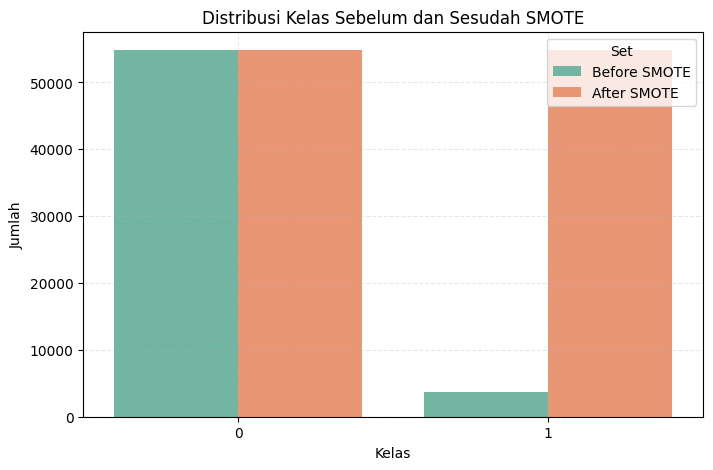

In [42]:
# Sebelum SMOTE
counter_before = Counter(y_original)

# Setelah SMOTE
counter_after = Counter(y_oversampled)

# Buat DataFrame untuk plotting
df_before = pd.DataFrame.from_dict(counter_before, orient='index').reset_index()
df_before.columns = ['Class', 'Count']
df_before['Set'] = 'Before SMOTE'

df_after = pd.DataFrame.from_dict(counter_after, orient='index').reset_index()
df_after.columns = ['Class', 'Count']
df_after['Set'] = 'After SMOTE'

# Gabungkan keduanya
df_combined = pd.concat([df_before, df_after])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_combined, x='Class', y='Count', hue='Set', palette='Set2')
plt.title('Distribusi Kelas Sebelum dan Sesudah SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


In [43]:
# Ambil fitur penting saja
X_oversampled_filtered = pd.DataFrame(X_oversampled, columns=X_encoded.columns)[top_features]
y_oversampled_filtered = y_oversampled

In [44]:
# Split data oversampled
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversampled_filtered, y_oversampled_filtered, test_size=0.4, random_state=42)

## Modeling

In [45]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

## Training and Evaluation


==== Random Forest ====
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22024
           1       0.95      0.88      0.91     21852

    accuracy                           0.91     43876
   macro avg       0.92      0.91      0.91     43876
weighted avg       0.92      0.91      0.91     43876



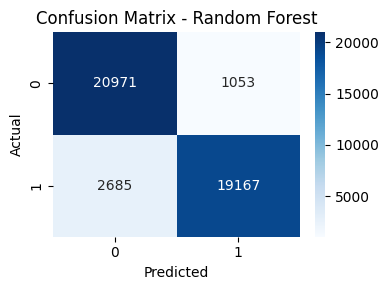


==== Logistic Regression ====
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.54      0.56     22024
           1       0.57      0.63      0.60     21852

    accuracy                           0.58     43876
   macro avg       0.58      0.58      0.58     43876
weighted avg       0.58      0.58      0.58     43876



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


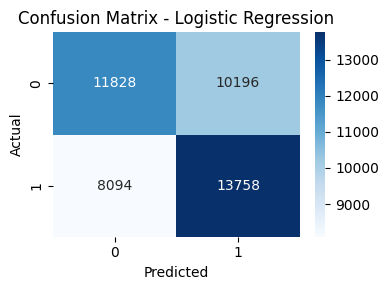


==== Decision Tree ====
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     22024
           1       0.91      0.91      0.91     21852

    accuracy                           0.91     43876
   macro avg       0.91      0.91      0.91     43876
weighted avg       0.91      0.91      0.91     43876



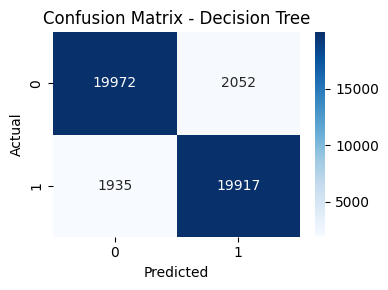


==== Naive Bayes ====
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.55      0.61     22024
           1       0.62      0.73      0.67     21852

    accuracy                           0.64     43876
   macro avg       0.65      0.64      0.64     43876
weighted avg       0.65      0.64      0.64     43876



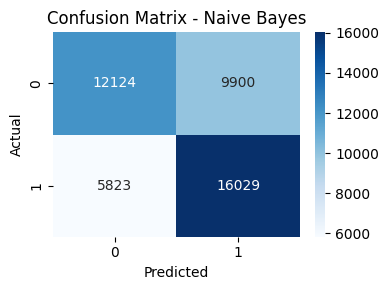


==== SVM ====
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.21      0.31     22024
           1       0.51      0.82      0.63     21852

    accuracy                           0.52     43876
   macro avg       0.53      0.52      0.47     43876
weighted avg       0.53      0.52      0.47     43876



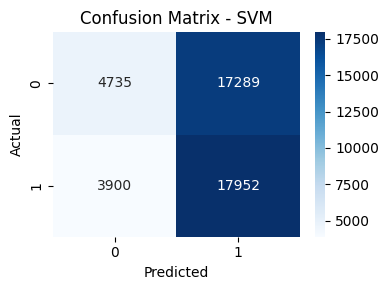


==== KNN ====
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81     22024
           1       0.82      0.80      0.81     21852

    accuracy                           0.81     43876
   macro avg       0.81      0.81      0.81     43876
weighted avg       0.81      0.81      0.81     43876



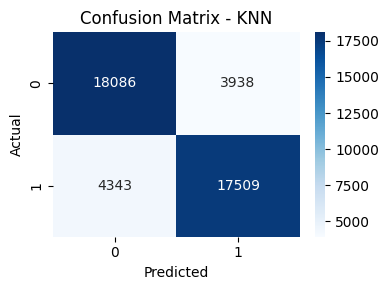


==== AdaBoost ====
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.60      0.67     22024
           1       0.67      0.82      0.74     21852

    accuracy                           0.71     43876
   macro avg       0.72      0.71      0.70     43876
weighted avg       0.72      0.71      0.70     43876



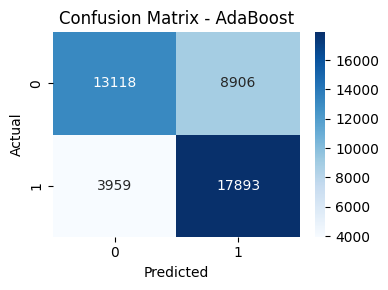


==== GradientBoosting ====
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89     22024
           1       0.92      0.84      0.88     21852

    accuracy                           0.88     43876
   macro avg       0.88      0.88      0.88     43876
weighted avg       0.88      0.88      0.88     43876



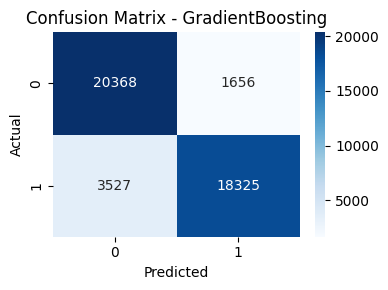

In [46]:
# Training dan evaluasi
for name, model in models.items():
    print(f"\n==== {name} ====")
    model.fit(X_train_os, y_train_os)  # Training pada data oversampled
    y_pred = model.predict(X_test_os)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test_os, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test_os, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

## Select Model

In [47]:
# Ambil model Decision Tree dari dictionary dan latih
dt_model = models['Decision Tree']
dt_model.fit(X_train_os, y_train_os)

# Lakukan prediksi terhadap data test
y_pred = dt_model.predict(X_test_os)

In [48]:
# Tampilkan classification report
print("Classification Report:")
print(classification_report(y_test_os, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     22024
           1       0.91      0.91      0.91     21852

    accuracy                           0.91     43876
   macro avg       0.91      0.91      0.91     43876
weighted avg       0.91      0.91      0.91     43876



- Hasil Evaluasi

Berdasarkan hasil evaluasi diatas maka di dapatlah hasil :
  - Accuracy : 0.91, dimana model berhasil mengklasifikasikan dengan benar sebanyak 91% dari total data, yang mengartikan bahwa performa cukup baik secar keseluruhan.
  - Precision (kelas 0 dan 1) : 0.91, semua prediksi pada kelas 0 dan 1 kemungkinan 91% benar.
  - Recall (kelas 0 dan 1) : 0.91, model juga mampu menemukan 91% dari seluruh data sebenarnya pada masing-masing kelas.
  - F1-score (kelas 0 dan 1): 0.91, menunjukkan keseimbangan baik antara precision dan recall di kedua kelas.

Maka, dapat disimpulkan bahwa model cukup seimbang dalam performa untuk kedua kelas, tidak ada bias yang signifikan ke satu kelas saja. Dengan skor di atas 0.9, model ini sudah cukup baik untuk dipakai dalam kasus dengan tingkat kesalahan yang bisa ditoleransi sekitar 9%.

# Save Model

In [49]:
# Simpan model
joblib.dump(dt_model, 'model.joblib')

['model.joblib']

In [50]:
# Saat training:
categorical_columns = top_features
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Simpan semua encoders
joblib.dump(label_encoders, 'preprocessor.joblib')


['preprocessor.joblib']